# **Problem Statement**

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

**Goals of the Case Study**

 - Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
 

 - There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

# **Segment - I : Data Understanding**

## Importing the libraries and reading the dataset

In [489]:
# Importing the useful libraries and functions

# Suppress Warnings

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Import Numpy and Pandas Library

import pandas as pd
import numpy as np

# Import Matplotlib and Seaborn Libraries for Data visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Using Pandas Inbuilt function to display all columns and rows present in Dataset

pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

# Using sklearn library and importing train_test_split function to create Training & Test Datasets

from sklearn.model_selection import train_test_split

# Using sklearn library and importing StandardScaler function for feature scaling

# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Using sklearn library and importing RFE and LogisticRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Importing statsmodel library

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

from sklearn.metrics import precision_recall_curve

In [490]:
# Reading the dataset

leads = pd.read_csv("Leads.csv")

In [491]:
# Printing the first five rows of the dataframe 'leads'

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Data inspection

### Basic structure checking

In [492]:
# Checking the shape of dataframe

leads.shape

(9240, 37)

**There are 9240 rows and 37 columns initially.**

In [493]:
# Printing information about the attributes of 'leads'

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [494]:
# Checking the size of dataframe

leads.size

341880

In [495]:
# Finding the basic statistical values for numerical data

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Checking missing values and duplicated rows

In [496]:
# Calculating the missing values in each column of the dataframe

leads.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [497]:
# Calculating the percentage of missing values in each column

round(100*(leads.isnull().sum())/len(leads), 2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [498]:
# Checking for duplicated rows

leads.duplicated().sum()

0

In [499]:
leads.shape,leads.drop_duplicates().shape

((9240, 37), (9240, 37))

***Observation:***

**There are no duplicated rows in this dataframe. The same is verified by checking the shape of the dataframe before and after dropping duplicates, if any.**

## **Data cleaning**


In [500]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [501]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Checking value counts for each categorical column

In [502]:
var_list = ['Lead Origin','Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'Last Activity', 'Country', 
            'Specialization', 'How did you hear about X Education', 'What is your current occupation', 
            'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 
            'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations',
            'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 
            'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 
            'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


for i in var_list:
    ans=leads[i].value_counts(dropna=False)
    print(f"{i} Count:\n\n{ans}",end='\n\n')
    print('--'*50)
    

Lead Origin Count:

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

----------------------------------------------------------------------------------------------------
Lead Source Count:

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

-------------------------------------------------------------

**Observation:**

**There are categories named 'Select' in columns like 'Specialization', 'How did you hear about X Education', 'Lead Profile', etc. This is because the site visitors have not selected any response for this and it is as good as 'NaN' or a null value. Hence, replacing 'Select' with NaN.**

### Replacing 'Select' with NaN

In [503]:
# Replacing 'Select' with NaN since no option is selected for these values

leads = leads.replace('Select',np.nan)

### Dropping columns having more than 35% null values

In [504]:
# Finding missing value percencentage in each column

null_percent = round(100*(leads.isnull().sum())/len(leads), 2).sort_values(ascending=False)
print(null_percent)

# List of columns having more than 35% null values.

null_percent[null_percent > 35].index

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

Index(['How did you hear about X Education', 'Lead Profile', 'Lead Quality',
       'Asymmetrique Profile Score', 'Asymmetrique Activity Score',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'City',
       'Specialization', 'Tags'],
      dtype='object')

**Approach :**

**1. Dropping all the columns that have extremely high missing values. Considering that value as 35% in this case study.**

In [505]:
# Dropping columns having more than 35% of null values

leads = leads.drop(null_percent[null_percent > 35].index , axis= 1)

# Checking the shape again after dropping columns
leads.shape

(9240, 27)

### Checking the number of unique values in each column

In [506]:
# Finding the number of unique values in each column

leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

**Observation:**

1. There are columns which have just one unique value and these will not play any significant role in further analysis. Hence, dropping those columns.

In [507]:
# Dropping unique valued columns

leads= leads.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',
                   'Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)
leads.shape

(9240, 22)

In [508]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


### Dropping unnecassary columns

In [509]:
# Finding rows which have all null values.

leads[leads.isnull().all(axis=1)].shape

(0, 22)

**There are no rows which have all null values present.**

**'Prospect ID' and 'Lead Number' is the unique ID and a lead number assigned to each lead, with which the customer is identified. These are all unique values for each customer, hence dropping these columns as they will not provide any insight to the analysis.**

In [510]:
# Dropping 'Lead Number' and 'Prospect ID'.

leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)
leads.shape

(9240, 20)

In [511]:
# Checking null value percentage in each column

round(100*(leads.isnull().sum())/len(leads),2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Newspaper Article                                 0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
Lead Origin                                       0.00
Search                                            0.00
Total Time Spent on Website                       0.00
Converted                                         0.00
Do Not Call                                       0.00
Do Not Ema

**Country**

In [512]:
# Checking the unique categories in 'Country'

leads['Country'].value_counts(normalize=True,dropna=False)

India                   0.702597
NaN                     0.266342
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Bahrain                 0.000758
Hong Kong               0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
Kuwait                  0.000433
South Africa            0.000433
Canada                  0.000433
Nigeria                 0.000433
Germany                 0.000433
Sweden                  0.000325
Philippines             0.000216
Uganda                  0.000216
Italy                   0.000216
Bangladesh              0.000216
Netherlands             0.000216
Asia/Pacific Region     0.000216
China                   0.000216
Belgium                 0.000216
Ghana                   0.000216
Kenya                   0.000108
Sri Lanka 

**It can be seen, more than 70% of the entries are from 'India' and more than 26% are missing values, hence dropping this column as it will not provide anything significant in the analysis.**

In [513]:
# Dropping column 'Country'

leads.drop(['Country'], 1, inplace = True)
leads.shape

(9240, 19)

In [514]:
# Checking null value percentage in each column

round(100*(leads.isnull().sum())/len(leads),2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Newspaper Article                                 0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
Lead Origin                                       0.00
Search                                            0.00
Total Time Spent on Website                       0.00
Converted                                         0.00
Do Not Call                                       0.00
Do Not Email                                      0.00
Last Notab

**What is your current occupation**

In [515]:
# Checking the unique value counts for the column 'What is your current occupation'

leads['What is your current occupation'].value_counts(normalize=True, dropna=False)

Unemployed              0.606061
NaN                     0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [516]:
# Since the number of missing values is high in 'What is your current occupation', we are dropping the null valued rows 
# in this column, as imputation might lead to biasness in the model.


leads=leads[~pd.isnull(leads['What is your current occupation'])]

# Renaming the column to "Occupation" for easier interpretation

leads.rename(columns = {'What is your current occupation':'Occupation'}, inplace = True)
leads['Occupation'].isnull().sum()

0

In [517]:
leads['Occupation'].value_counts(normalize=True, dropna=False)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: Occupation, dtype: float64

In [518]:
leads.shape

(6550, 19)

In [519]:
# Checking null value percentage in each column

round(100*(leads.isnull().sum())/len(leads),2).sort_values(ascending=False)

TotalVisits                                      1.98
Page Views Per Visit                             1.98
Last Activity                                    1.57
Lead Source                                      0.55
What matters most to you in choosing a course    0.29
Lead Origin                                      0.00
Newspaper Article                                0.00
A free copy of Mastering The Interview           0.00
Through Recommendations                          0.00
Digital Advertisement                            0.00
Newspaper                                        0.00
X Education Forums                               0.00
Occupation                                       0.00
Search                                           0.00
Total Time Spent on Website                      0.00
Converted                                        0.00
Do Not Call                                      0.00
Do Not Email                                     0.00
Last Notable Activity       

**What matters most to you in choosing a course**

In [520]:
# Checking the unique value counts for the column 'What matters most to you in choosing a course'

leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                            19
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [521]:
# Since the missing values are less in number, replacing "NaN" with "Other" in the column
# 'What matters most to you in choosing a course' 


leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan,"Other")

# Renaming the column to "Course Motto" for easier interpretation

leads.rename(columns = {'What matters most to you in choosing a course':'Course Motto'}, inplace = True)
leads['Course Motto'].isnull().sum()

0

In [522]:
leads['Course Motto'].value_counts(dropna=False)

Better Career Prospects      6528
Other                          20
Flexibility & Convenience       2
Name: Course Motto, dtype: int64

**There are columns which have very less missing values. These rows can be imputed with their mean,median or mode values, as and when necessary**

**Lead Source**

In [523]:
leads['Lead Source'].value_counts(dropna=False, normalize=True)

Google               0.312672
Direct Traffic       0.288702
Olark Chat           0.136336
Organic Search       0.132824
Reference            0.081527
Welingak Website     0.021679
Referral Sites       0.011450
Facebook             0.007023
NaN                  0.005496
Click2call           0.000611
bing                 0.000458
Social Media         0.000305
Live Chat            0.000305
Pay per Click Ads    0.000153
WeLearn              0.000153
testone              0.000153
Press_Release        0.000153
Name: Lead Source, dtype: float64

In [524]:
leads['Lead Source'].mode()[0]

'Google'

In [525]:
# Imputing the null valued rows in the column 'Lead Source' with its mode value

leads['Lead Source'] = leads['Lead Source'].fillna(leads['Lead Source'].mode()[0])
leads['Lead Source'].isnull().sum()

0

In [526]:
# Combining categories of very low percentage as "Others"


def lead_source_categories(x):
    
    if x in  ['Google','google']:
        return 'Google'
    elif x in ['Facebook','Social Media']:
        return 'Social Media'
    elif x == 'Direct Traffic':
        return 'Direct Traffic'
    elif x == 'Olark Chat':
        return 'Olark Chat'
    elif x == 'Organic Search':
        return 'Organic Search'
    elif x == 'Reference':
        return 'Reference'
    else:
        return 'Others'

leads['Lead Source'] = leads['Lead Source'].apply(lead_source_categories)
leads['Lead Source'].value_counts(normalize=True)

Google            0.318168
Direct Traffic    0.288702
Olark Chat        0.136336
Organic Search    0.132824
Reference         0.081527
Others            0.035115
Social Media      0.007328
Name: Lead Source, dtype: float64

**TotalVisits**

In [527]:
leads['TotalVisits'].isnull().sum()

130

In [528]:
# Checking for mean and median values

print(leads['TotalVisits'].mean())
print(leads['TotalVisits'].median())

3.6040498442367603
3.0


In [529]:
# Imputing the null valued rows in the column 'TotalVisits' with its median value

leads['TotalVisits'] = leads['TotalVisits'].fillna(leads['TotalVisits'].median())
leads['TotalVisits'].isnull().sum()

0

**Page Views Per Visit**

In [530]:
leads['Page Views Per Visit'].isnull().sum()

130

In [531]:
# Checking for mean and median values

print(leads['Page Views Per Visit'].mean())
print(leads['Page Views Per Visit'].median())

2.466978193146415
2.0


In [532]:
# Imputing the null valued rows in the column 'Page Views Per Visit' with its median value


leads['Page Views Per Visit'] = leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].median())
leads['Page Views Per Visit'].isnull().sum()

0

**Last Activity**

In [533]:
leads['Last Activity'].value_counts(dropna=False, normalize=True)

Email Opened                    0.375573
SMS Sent                        0.337863
Page Visited on Website         0.065496
Olark Chat Conversation         0.065344
Converted to Lead               0.045191
Email Bounced                   0.030076
Email Link Clicked              0.027176
NaN                             0.015725
Form Submitted on Website       0.012519
Unreachable                     0.011298
Unsubscribed                    0.006565
Had a Phone Conversation        0.004275
Approached upfront              0.001374
View in browser link Clicked    0.000763
Email Received                  0.000305
Email Marked Spam               0.000305
Visited Booth in Tradeshow      0.000153
Name: Last Activity, dtype: float64

In [534]:
leads['Last Activity'].value_counts().index

Index(['Email Opened', 'SMS Sent', 'Page Visited on Website',
       'Olark Chat Conversation', 'Converted to Lead', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation', 'Approached upfront',
       'View in browser link Clicked', 'Email Received', 'Email Marked Spam',
       'Visited Booth in Tradeshow'],
      dtype='object')

In [535]:
# Combining categories in the column 'Last Activity' for value counts less than ~3%

leads['Last Activity'] = leads['Last Activity'].replace([np.nan,'Email Link Clicked','Form Submitted on Website',
                                                         'Unreachable', 'Unsubscribed', 'Had a Phone Conversation', 
                                                         'Approached upfront', 'View in browser link Clicked',
                                                         'Email Received', 'Email Marked Spam',
                                                         'Visited Booth in Tradeshow'],'Others')


leads['Last Activity'].value_counts(normalize=True)

Email Opened               0.375573
SMS Sent                   0.337863
Others                     0.080458
Page Visited on Website    0.065496
Olark Chat Conversation    0.065344
Converted to Lead          0.045191
Email Bounced              0.030076
Name: Last Activity, dtype: float64

**Last Notable Activity**

In [536]:
leads['Last Notable Activity'].value_counts(dropna=False, normalize=True)

Modified                        0.320000
Email Opened                    0.311756
SMS Sent                        0.288397
Page Visited on Website         0.032672
Email Link Clicked              0.016794
Olark Chat Conversation         0.011603
Email Bounced                   0.007634
Unsubscribed                    0.005038
Unreachable                     0.003359
Had a Phone Conversation        0.001985
Email Marked Spam               0.000305
Approached upfront              0.000153
View in browser link Clicked    0.000153
Email Received                  0.000153
Name: Last Notable Activity, dtype: float64

In [537]:
leads['Last Notable Activity'].value_counts().index

Index(['Modified', 'Email Opened', 'SMS Sent', 'Page Visited on Website',
       'Email Link Clicked', 'Olark Chat Conversation', 'Email Bounced',
       'Unsubscribed', 'Unreachable', 'Had a Phone Conversation',
       'Email Marked Spam', 'Approached upfront',
       'View in browser link Clicked', 'Email Received'],
      dtype='object')

In [538]:
# Combining categories in the column 'Last Notable Activity' for value counts less than ~3%

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Email Bounced', 'Unsubscribed', 'Unreachable', 
                                                                         'Had a Phone Conversation', 'Email Marked Spam',
                                                                         'Approached upfront', 'View in browser link Clicked',
                                                                         'Email Received'], 'Others')

leads['Last Notable Activity'].value_counts(normalize=True)
    

                                                                        

Modified                   0.320000
Email Opened               0.311756
SMS Sent                   0.288397
Page Visited on Website    0.032672
Others                     0.018779
Email Link Clicked         0.016794
Olark Chat Conversation    0.011603
Name: Last Notable Activity, dtype: float64

**'Newspaper' and 'Newspaper Article'**

In [539]:
print(leads['Newspaper'].value_counts(normalize=True))
print('\n\n')
print(leads['Newspaper Article'].value_counts(normalize=True))

No     0.999847
Yes    0.000153
Name: Newspaper, dtype: float64



No     0.999847
Yes    0.000153
Name: Newspaper Article, dtype: float64


**'Newspaper' and 'Newspaper Article' have almost similar results, and more than 99.98% values are marked 'No'. So dropping these two columns as it will give nothing significant**

In [540]:
# Dropping column 'Newspaper' and 'Newspaper Article'

leads.drop(['Newspaper','Newspaper Article'], 1, inplace = True)
leads.shape

(6550, 17)

In [541]:
# Checking null value percentage in each column

round(100*(leads.isnull().sum())/len(leads),2).sort_values(ascending=False)

Lead Origin                               0.0
Occupation                                0.0
A free copy of Mastering The Interview    0.0
Through Recommendations                   0.0
Digital Advertisement                     0.0
X Education Forums                        0.0
Search                                    0.0
Course Motto                              0.0
Last Activity                             0.0
Lead Source                               0.0
Page Views Per Visit                      0.0
Total Time Spent on Website               0.0
TotalVisits                               0.0
Converted                                 0.0
Do Not Call                               0.0
Do Not Email                              0.0
Last Notable Activity                     0.0
dtype: float64

In [542]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Occupation', 'Course Motto',
       'Search', 'X Education Forums', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [543]:
var_list = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted','Last Activity', 'Occupation', 'Course Motto',
       'Search', 'X Education Forums', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Last Notable Activity']


for i in var_list:
    ans=leads[i].value_counts(dropna=False, normalize=True)
    print(f"{i} Count:\n\n{ans}",end='\n\n')
    print('--'*50)

Lead Origin Count:

Landing Page Submission    0.556336
API                        0.326870
Lead Add Form              0.109618
Lead Import                0.007023
Quick Add Form             0.000153
Name: Lead Origin, dtype: float64

----------------------------------------------------------------------------------------------------
Lead Source Count:

Google            0.318168
Direct Traffic    0.288702
Olark Chat        0.136336
Organic Search    0.132824
Reference         0.081527
Others            0.035115
Social Media      0.007328
Name: Lead Source, dtype: float64

----------------------------------------------------------------------------------------------------
Do Not Email Count:

No     0.92916
Yes    0.07084
Name: Do Not Email, dtype: float64

----------------------------------------------------------------------------------------------------
Do Not Call Count:

No     0.999695
Yes    0.000305
Name: Do Not Call, dtype: float64

--------------------------------------------

**'Do Not Call','Search', 'X Education Forums','Digital Advertisement','Through Recommendations' have 99.9% single value, which signifies very high data imbalance. Hence, dropping these columns as they will not add any significance to the model building.**

In [544]:
# Dropping column 'Do Not Call','Search', 'X Education Forums','Digital Advertisement','Through Recommendations'

leads.drop(['Do Not Call','Search', 'X Education Forums','Digital Advertisement','Through Recommendations'], 1, inplace = True)
leads.shape

(6550, 12)

In [545]:
# Finding the percentage of rows(data) retained after data cleaning

(leads.shape[0]/9240)*100

70.88744588744589

**The data is now free from any missing value and we have retained 70% of the data after data cleaning process.**

# **Segment - II : Exploratory Data Analysis**

## Segregating continuous and categorical variables

In [546]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6550 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6550 non-null   object 
 1   Lead Source                             6550 non-null   object 
 2   Do Not Email                            6550 non-null   object 
 3   Converted                               6550 non-null   int64  
 4   TotalVisits                             6550 non-null   float64
 5   Total Time Spent on Website             6550 non-null   int64  
 6   Page Views Per Visit                    6550 non-null   float64
 7   Last Activity                           6550 non-null   object 
 8   Occupation                              6550 non-null   object 
 9   Course Motto                            6550 non-null   object 
 10  A free copy of Mastering The Interview  6550 non-null   obje

In [547]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Occupation,Course Motto,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,Better Career Prospects,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Better Career Prospects,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Unemployed,Better Career Prospects,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,No,Modified


In [548]:
# Separating continuous and categorical columns

cont_cols=['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

cat_cols = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Occupation', 'Course Motto',
            'A free copy of Mastering The Interview', 'Last Notable Activity']

target=['Converted']

len(cont_cols)+len(cat_cols)+len(target)

12

## Checking data imbalance in target variable

In [549]:
leads.Converted.value_counts(normalize=True, dropna=False)

0    0.512824
1    0.487176
Name: Converted, dtype: float64

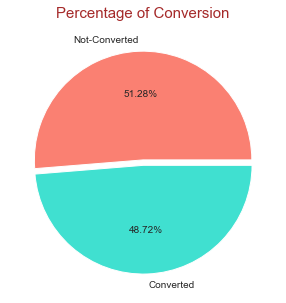

In [550]:
# Checking the percentage of conversion in TARGET column

plt.figure(figsize=[5,5])
plt.pie(leads.Converted.value_counts(normalize=True), labels= ['Not-Converted', 'Converted'], autopct='%.2f%%', explode=(0,0.05), colors=['salmon','turquoise'])
plt.title("Percentage of Conversion", fontsize=15, color= 'brown')
plt.show()


**Observation :**

**1. 48.72% of the total leads have converted and 51.28% have not converted.**

**2. There is very less Data imbalance in the target column - "Converted" and it is not large enough to produce biased results.**

**3. Hence 'stratified sampling' is not required during the train-test split.**

## Univariate Analysis

### Univariate Analysis on Numerical columns

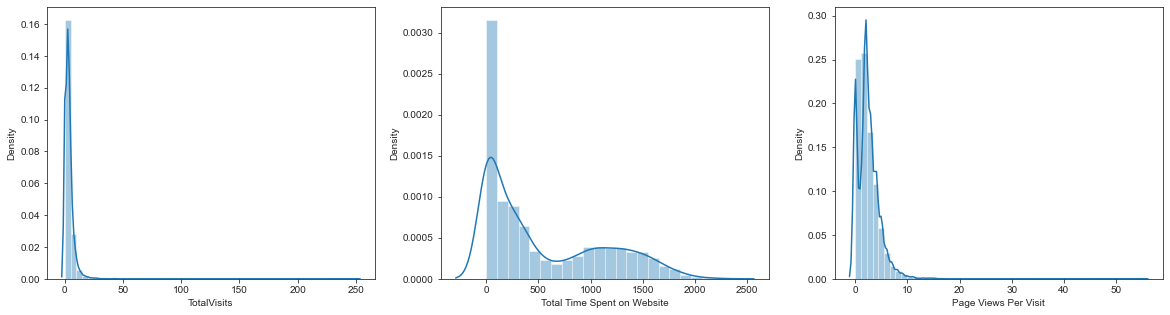

In [551]:
# Plotting distribution curve for continuous columns

plt.figure(figsize=(20,5))
for num in enumerate(cont_cols):
    plt.subplot(len(cont_cols)//2,3,num[0]+1)
    sns.distplot(leads[num[1]])
plt.show()

**Observation:**

1. The total number of visits made by the customer on the website is mostly between 0-30.


2. The total time spent by the customer on the website is high in the beginning with a gradual decrease, then again rising slightly. It is possible that customers who are likely to convert are re-visiting the website.

3. PAge views per visit lies mostly in the range of 0-10.

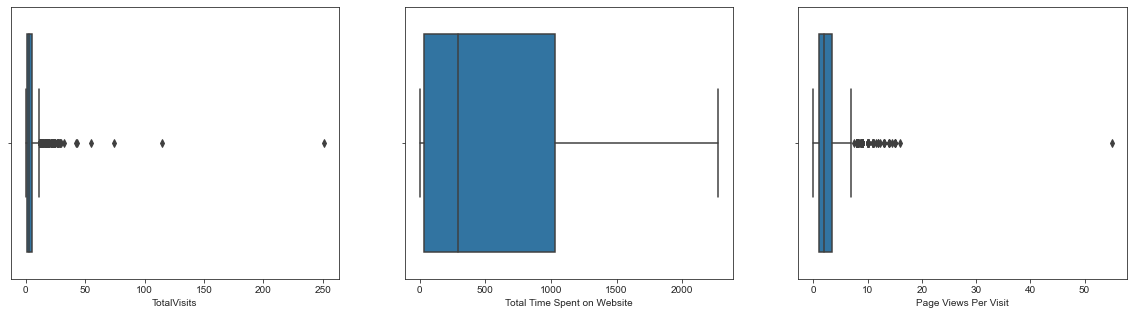

In [552]:
# Plotting boxplot on continuous columns for outlier detection

plt.figure(figsize=(20,5))
for num in enumerate(cont_cols):
    plt.subplot(len(cont_cols)//2,3,num[0]+1)
    sns.boxplot(leads[num[1]])
plt.show()

**Observation: Outliers are present but it is not very dominant.**

In [553]:
len(cat_cols)

8

### Univariate Analysis on Categorical columns

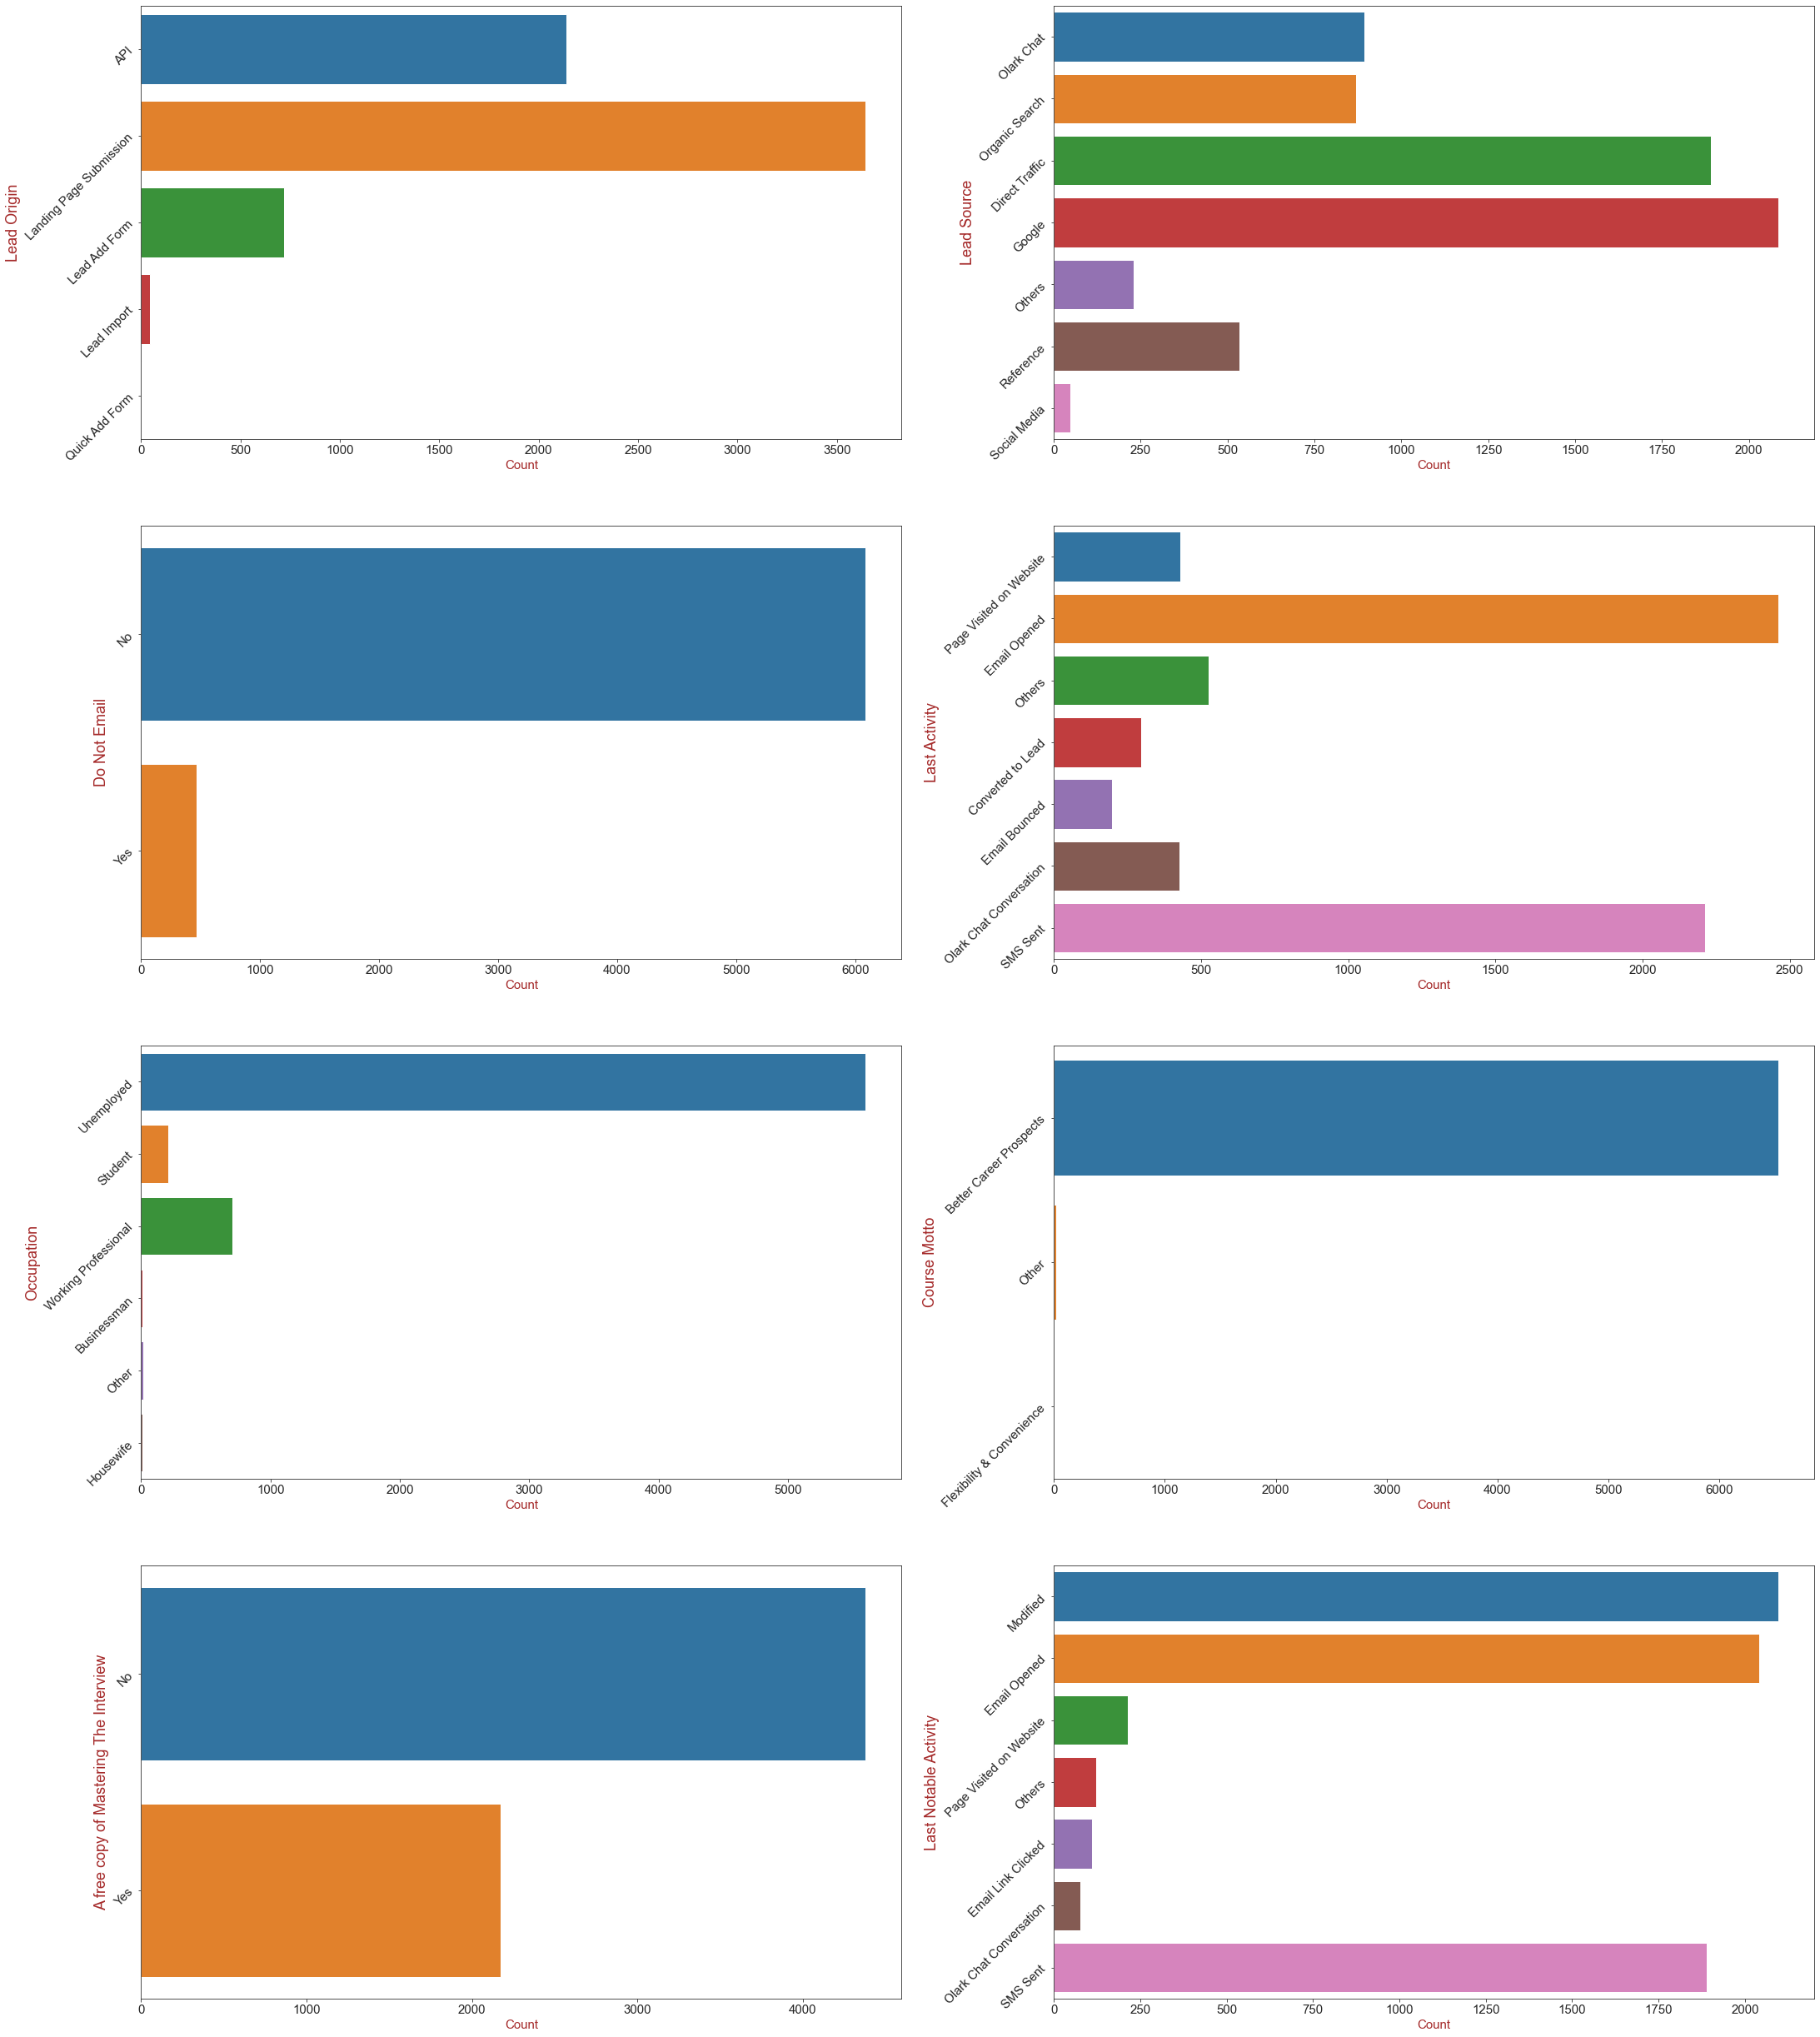

In [554]:
# Plotting Countplot for univariate analysis of categorical columns
 

plt.figure(figsize=(36,44))
for cat in enumerate(cat_cols):
    plt.subplot(4,2,cat[0]+1)
    sns.countplot(y = leads[cat[1]])
    plt.ylabel(cat[1], fontsize=18, fontweight=5, color='Brown')
    plt.xlabel("Count",fontsize=15, fontweight=5, color='Brown')
    plt.xticks(rotation=0, fontsize=15)
    plt.yticks(rotation=45, fontsize=15)
plt.show()


**Observation:**

1. 

## Bivariate Analysis

### Bivariate analysis of numerical variables with respect to target variable 'Converted'

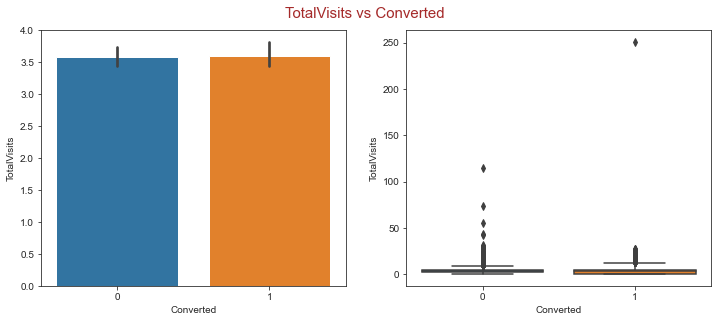

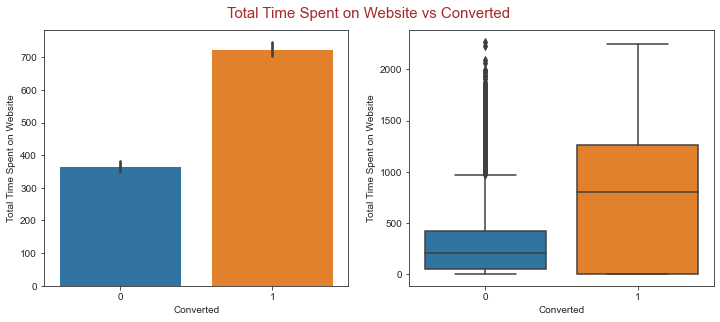

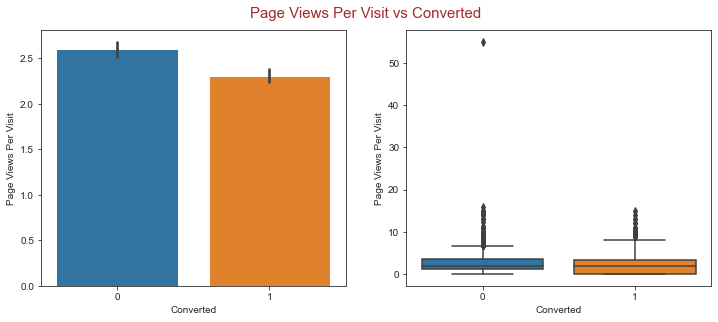

In [555]:
# Analysing all continuous columns with respect to the target variable 'Converted' using bar plot and box plot

for num in enumerate(cont_cols):
    plt.figure(figsize=(12,16))
    plt.subplot(len(cont_cols),num[0]+1,1)
    plt.suptitle(num[1] +" vs Converted", x=0.5, y=0.9, fontsize=15, fontweight=5,color='Brown')
    
    for pos in range(len(cont_cols)):
        plt.subplot(pos+1,2,1)
        sns.barplot(leads["Converted"],leads[num[1]])
        plt.subplot(pos+1,2,2)
        sns.boxplot(leads["Converted"],leads[num[1]])
plt.show()


**Observation:**
1. 

### Bivariate analysis of categorical variables with respect to target variable 'Converted'


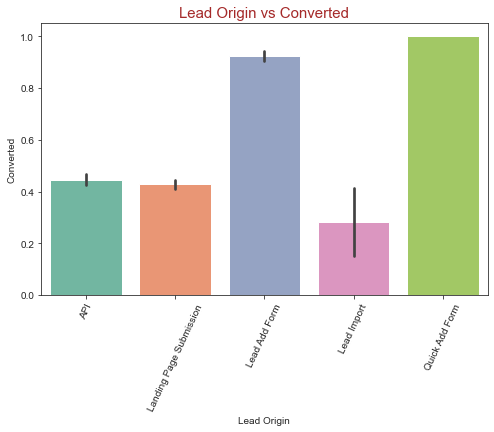

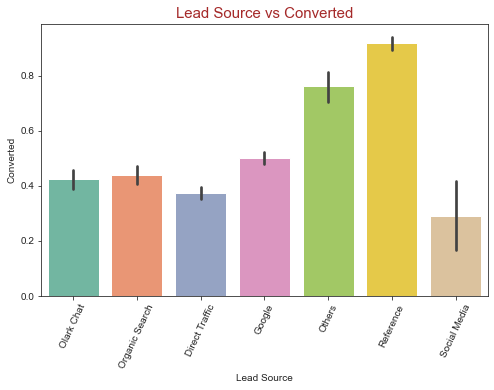

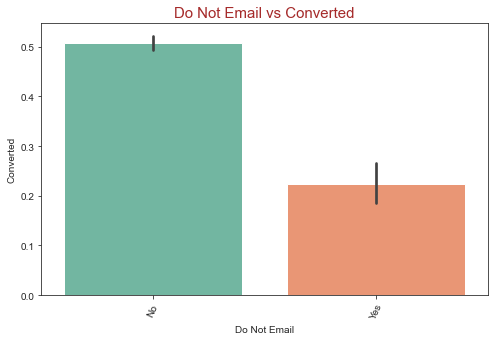

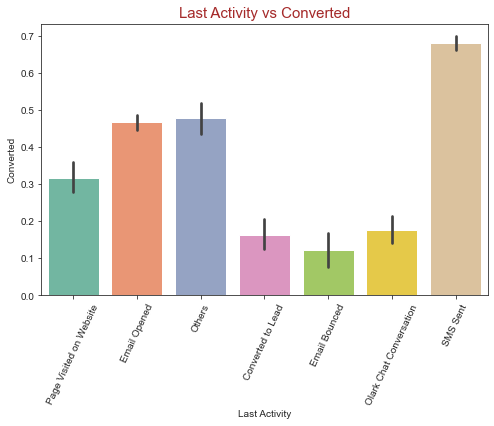

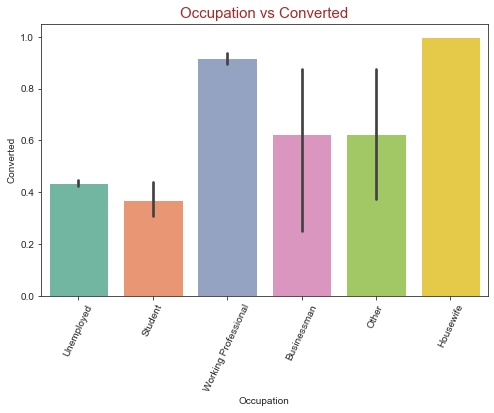

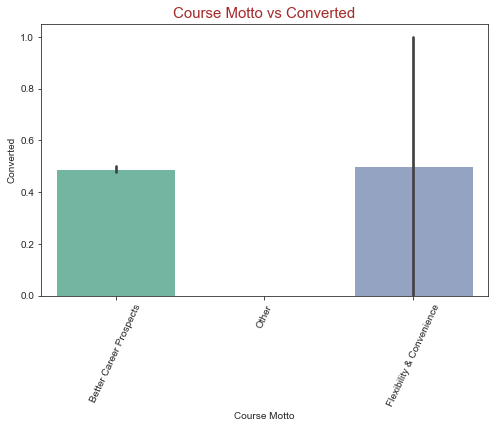

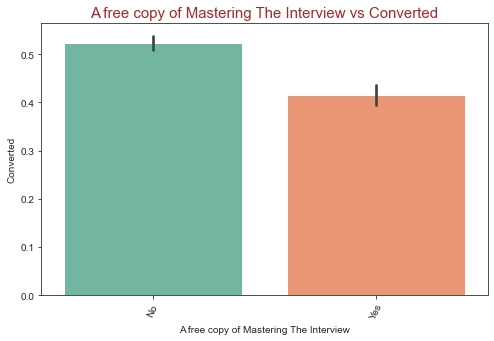

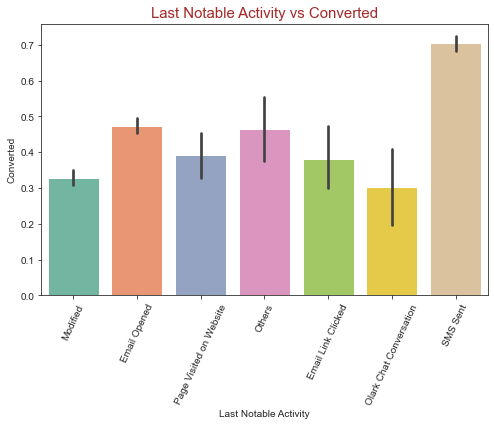

In [556]:
# Analysing all categorical columns with respect to the target variable 'Converted' using bar plot

for cat in enumerate(cat_cols):
    plt.subplots(1,1,figsize=(8,5))
    plt.title(cat[1] +" vs Converted", fontsize=15, fontweight=5, color='Brown')
    sns.barplot(leads[cat[1]],leads["Converted"], palette='Set2')
    plt.xticks(rotation=65)
plt.show()


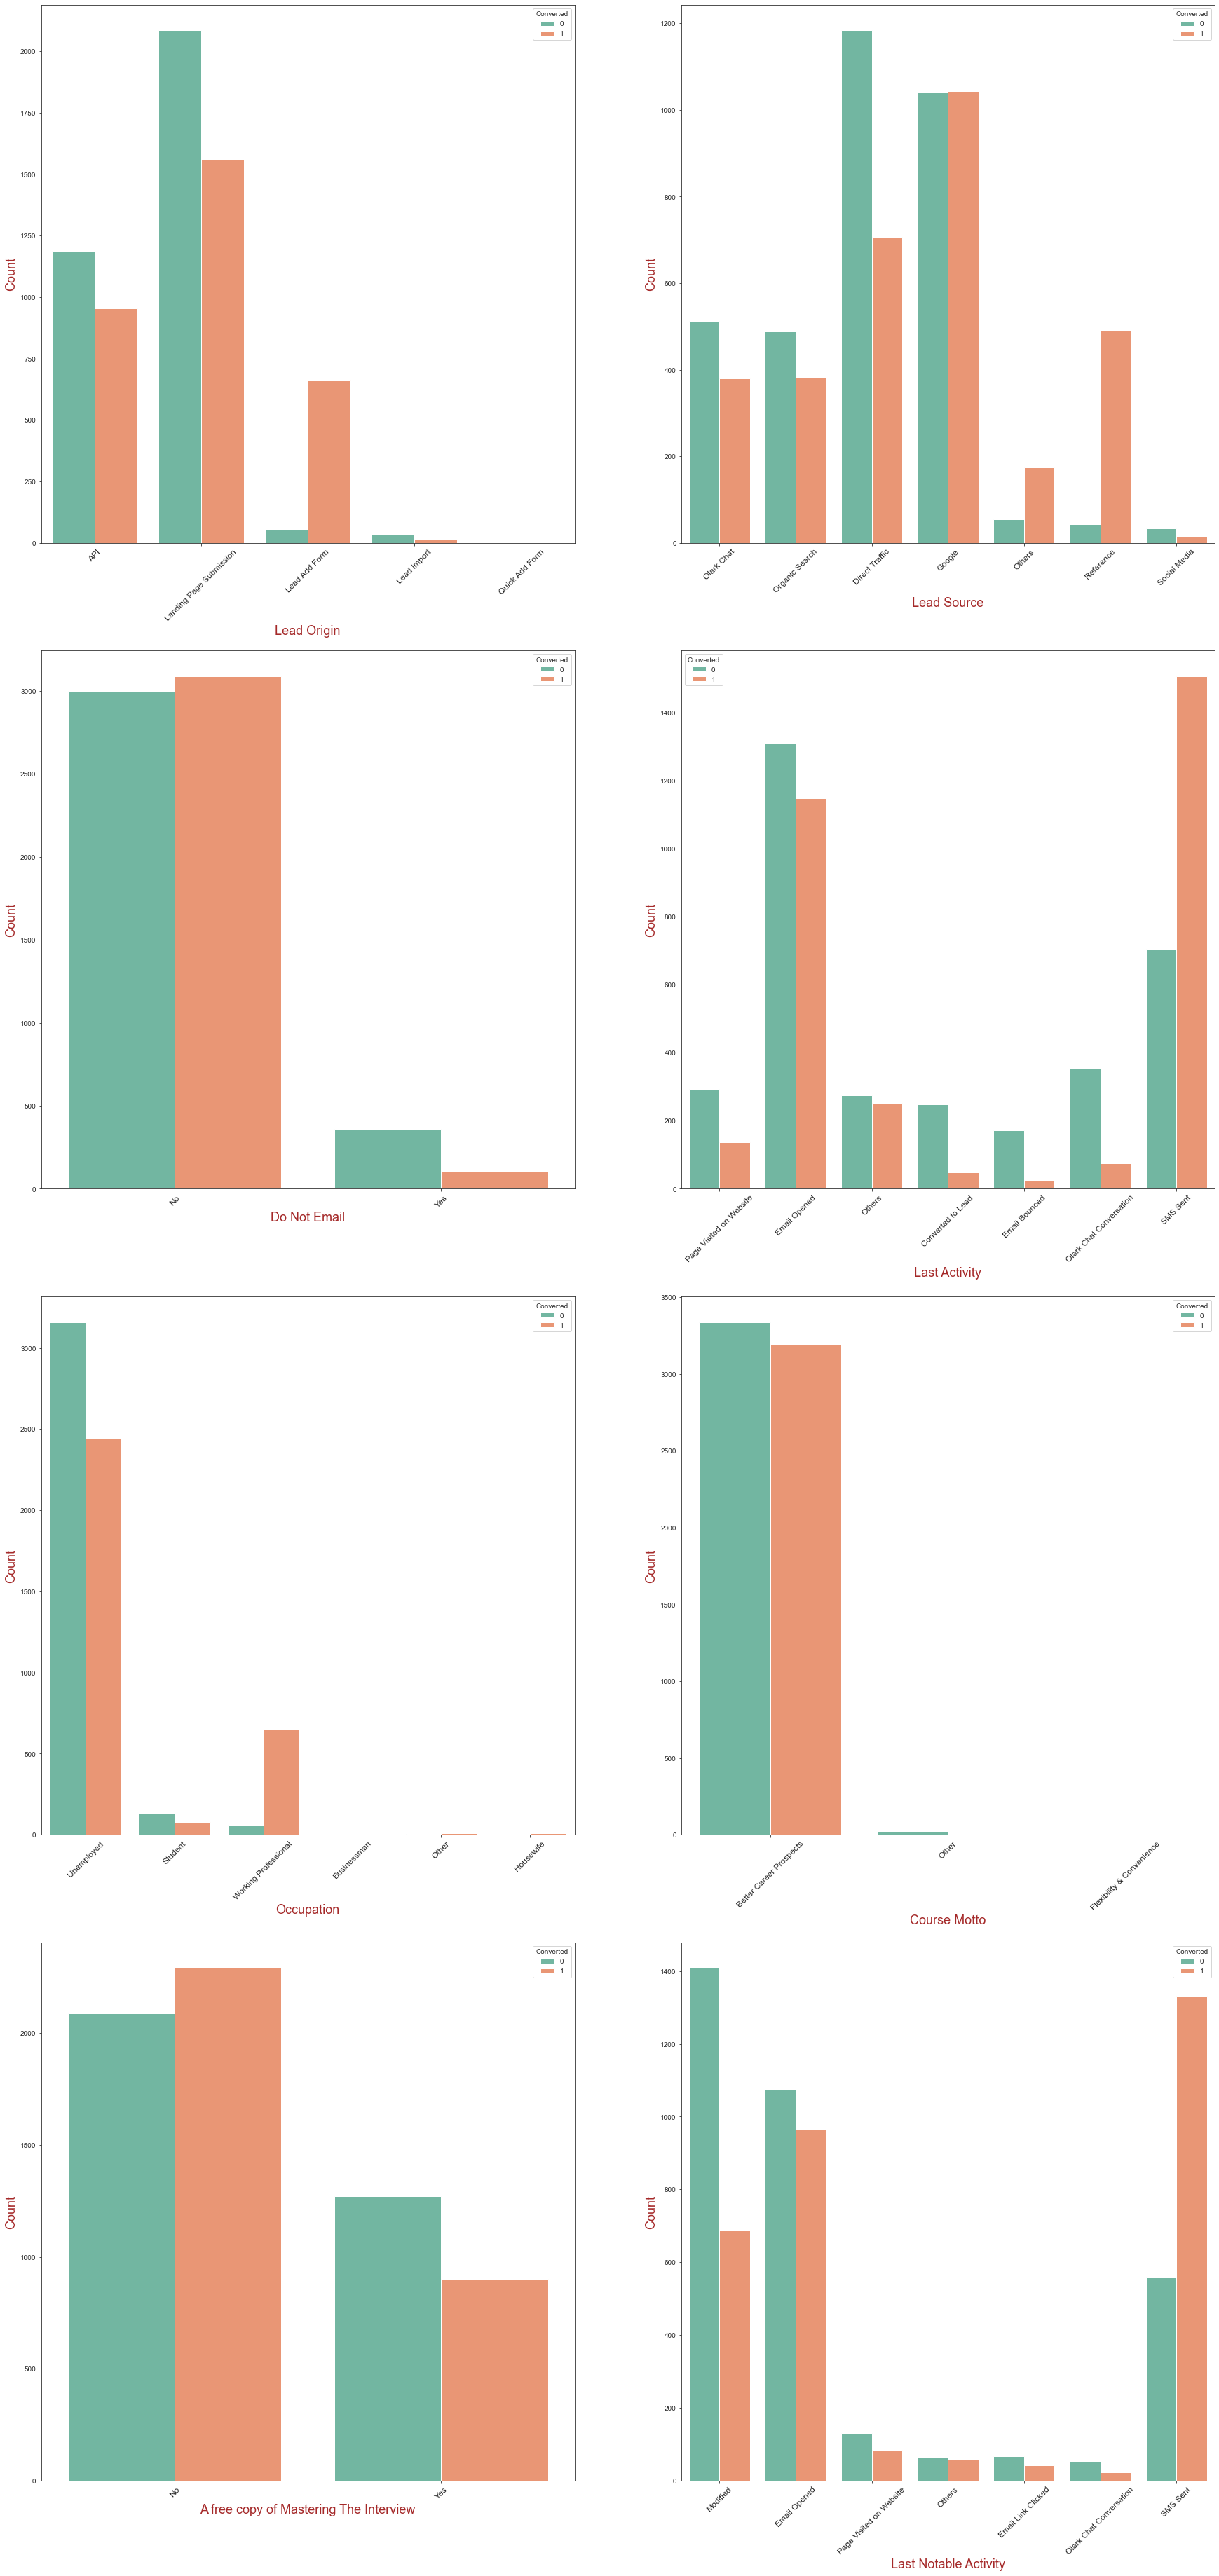

In [557]:
# Analysing the count of all categorical columns with respect to the target variable 'Converted' using bar plot

plt.figure(figsize=(30,65))
for cat in enumerate(cat_cols):
    plt.subplot(4,2,cat[0]+1)
    sns.countplot(data = leads, x=cat[1],hue='Converted', palette='Set2')
    plt.xlabel(cat[1], fontsize=18, fontweight=5, color='Brown')
    plt.ylabel("Count", fontsize=18, fontweight=5, color='Brown')
    plt.xticks(fontsize=12, rotation=45)
plt.show()


**Observation:**
1. 

## Multivariate Analysis

### Correlation of  numerical variable

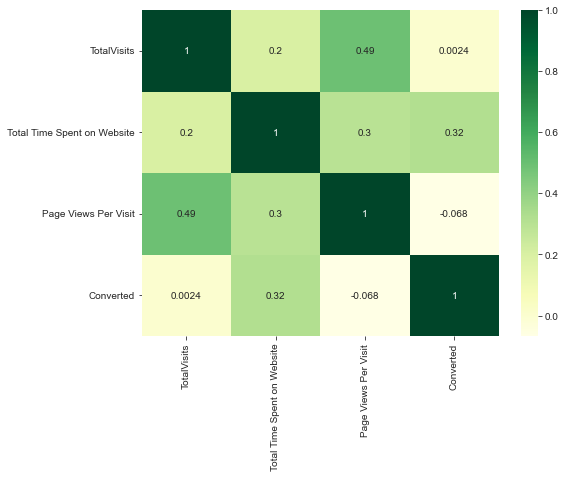

In [558]:
# Plotting a Heatmap for finding correlation of numerical variables, including the target variable.

plt.figure(figsize=(8,6))
sns.heatmap(leads[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Converted']].corr(),cmap="YlGn", annot=True)
plt.show()


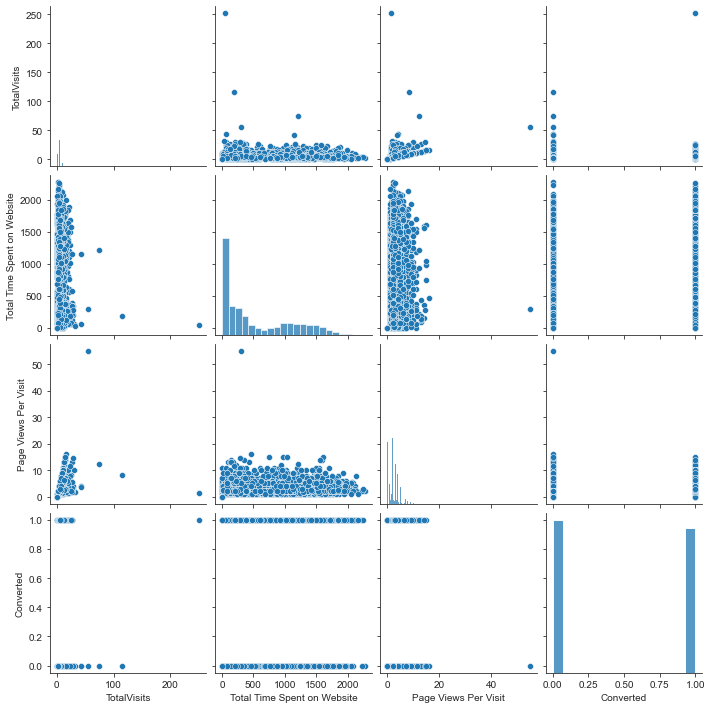

In [559]:
# Plotting a pairplot for checking correlation of numerical variables including the target variable.

sns.pairplot(data=leads, vars=['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Converted'])
plt.show()


**Observation:**
1. 

# **Segment - III : Data Preparation For Model Building**

## Pre-processing steps

In [560]:
leads.shape

(6550, 12)

In [561]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Occupation,Course Motto,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,Better Career Prospects,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Better Career Prospects,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Unemployed,Better Career Prospects,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,No,Modified


### Converting some binary variables (Yes/No) to 1/0

In [562]:
# List of variables to map

varlist =  ['Do Not Email','A free copy of Mastering The Interview']

# Defining the map function

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list

leads[varlist] = leads[varlist].apply(binary_map)


### Creating dummy variables

**For categorical variables with multiple levels, creating dummy features (one-hot encoded)**

In [563]:
print(cat_cols)

['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Occupation', 'Course Motto', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [564]:
leads.nunique()

Lead Origin                                  5
Lead Source                                  7
Do Not Email                                 2
Converted                                    2
TotalVisits                                 38
Total Time Spent on Website               1636
Page Views Per Visit                       107
Last Activity                                7
Occupation                                   6
Course Motto                                 3
A free copy of Mastering The Interview       2
Last Notable Activity                        7
dtype: int64

**Creating dummy variables for categorical columns that have more than 2 unique categories.**

In this 'leads' dataset, we will create dummies for the following categorical columns  - 'Lead Origin', 'Lead Source', 'Last Activity','Occupation', 'Course Motto', 'Last Notable Activity'

***Steps followed :***

 - Getting the dummy variables for the feature and storing it in a new variable.
 
 
 - Dropping a redundant dummy variable since (n-1) dummies can explain n categories.
 
 
 - Adding the results to the original dataframe.
 
 
 - Dropping the original column for which the dummies are created.


In [565]:
# Creating dummy variables for the columns 'Lead Origin', 'Lead Source', 'Last Activity', 'Occupation', 'Course Motto', 'Last Notable Activity'
# Simultaneously dropping the first redundant dummy variable

dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Occupation', 'Course Motto', 
                              'Last Notable Activity']], drop_first=True)

# Concatenating the results to the original 'leads' dataframe

leads = pd.concat([leads, dummy], axis=1)
leads.shape

(6550, 41)

In [566]:
# Dropping 'Lead Origin', 'Lead Source', 'Last Activity', 'Occupation', 'Course Motto', 'Last Notable Activity'
# as we have created dummies for these columns

leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Occupation', 'Course Motto',
            'Last Notable Activity'], axis = 1, inplace = True)

leads.shape

(6550, 35)

In [567]:
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Social Media,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Course Motto_Flexibility & Convenience,Course Motto_Other,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [568]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6550 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Do Not Email                                   6550 non-null   int64  
 1   Converted                                      6550 non-null   int64  
 2   TotalVisits                                    6550 non-null   float64
 3   Total Time Spent on Website                    6550 non-null   int64  
 4   Page Views Per Visit                           6550 non-null   float64
 5   A free copy of Mastering The Interview         6550 non-null   int64  
 6   Lead Origin_Landing Page Submission            6550 non-null   uint8  
 7   Lead Origin_Lead Add Form                      6550 non-null   uint8  
 8   Lead Origin_Lead Import                        6550 non-null   uint8  
 9   Lead Origin_Quick Add Form                     6550 

## Data Splitting

### Dividing data into X and y

In [569]:
# Separating X and y for 'leads' dataset

X = leads.drop(columns = 'Converted')
y = leads['Converted']


In [570]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Social Media,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Course Motto_Flexibility & Convenience,Course Motto_Other,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [571]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

### Splitting the Data into 'Training' and 'Testing' Sets


**The first basic step for regression is performing a train-test split.**

In [572]:
# Splitting dataframe into train and test sets, in 70:30 ratio for train and test respectively.

np.random.seed(0)

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size =0.7, test_size = 0.3, random_state = 100, stratify=y)

In [573]:
# Checking shape of training and testing datasets

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(4585, 34)
(4585,)
(1965, 34)
(1965,)


In [574]:
y_train.value_counts()

0    2351
1    2234
Name: Converted, dtype: int64

In [575]:
y_test.value_counts()

0    1008
1     957
Name: Converted, dtype: int64

## Rescaling the Features

 **Rescaling the features so that the units of the coefficients obtained are all on the same scale.**

In [576]:
# Using StandardScaler() for rescaling

scaler = StandardScaler()

In [577]:
cont_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [578]:
# Applying scaler() to all the columns except binary values (0-1) and 'dummy' variables of Training dataset

X_train[cont_cols] = scaler.fit_transform(X_train[cont_cols])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Social Media,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Course Motto_Flexibility & Convenience,Course Motto_Other,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
7574,0,-0.119584,-0.377497,0.231810,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
2922,0,-0.673975,-0.958002,-1.131721,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5603,0,-0.304381,1.914526,-0.222700,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
7191,0,-0.304381,0.995246,-0.222700,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
6223,0,-0.304381,0.774690,-0.222700,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1


In [579]:
X_train.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Social Media,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Course Motto_Flexibility & Convenience,Course Motto_Other,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
count,4585.000000,4.585000e+03,4.585000e+03,4.585000e+03,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000
mean,0.067394,4.637027e-18,5.500265e-17,1.343225e-16,0.331516,0.558561,0.108179,0.007197,0.000218,0.315376,0.134133,0.135660,0.035769,0.081570,0.007634,0.028571,0.378408,0.064558,0.080916,0.063904,0.336096,0.001745,0.002835,0.031625,0.854526,0.108179,0.000436,0.002835,0.316685,0.320174,0.010469,0.018103,0.033806,0.285278
std,0.250730,1.000109e+00,1.000109e+00,1.000109e+00,0.470809,0.496613,0.310640,0.084541,0.014768,0.464716,0.340832,0.342464,0.185733,0.273739,0.087046,0.166617,0.485043,0.245772,0.272736,0.244609,0.472424,0.041739,0.053178,0.175018,0.352617,0.310640,0.020883,0.053178,0.465234,0.466594,0.101792,0.133337,0.180749,0.451596
min,0.000000,-6.739747e-01,-9.580019e-01,-1.131721e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-3.043809e-01,-8.856594e-01,-6.772109e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-1.195840e-01,-4.339597e-01,-2.227003e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.500099e-01,8.523257e-01,4.590656e-01,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,4.571005e+01,3.050833e+00,2.386636e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking the Correlation Matrix

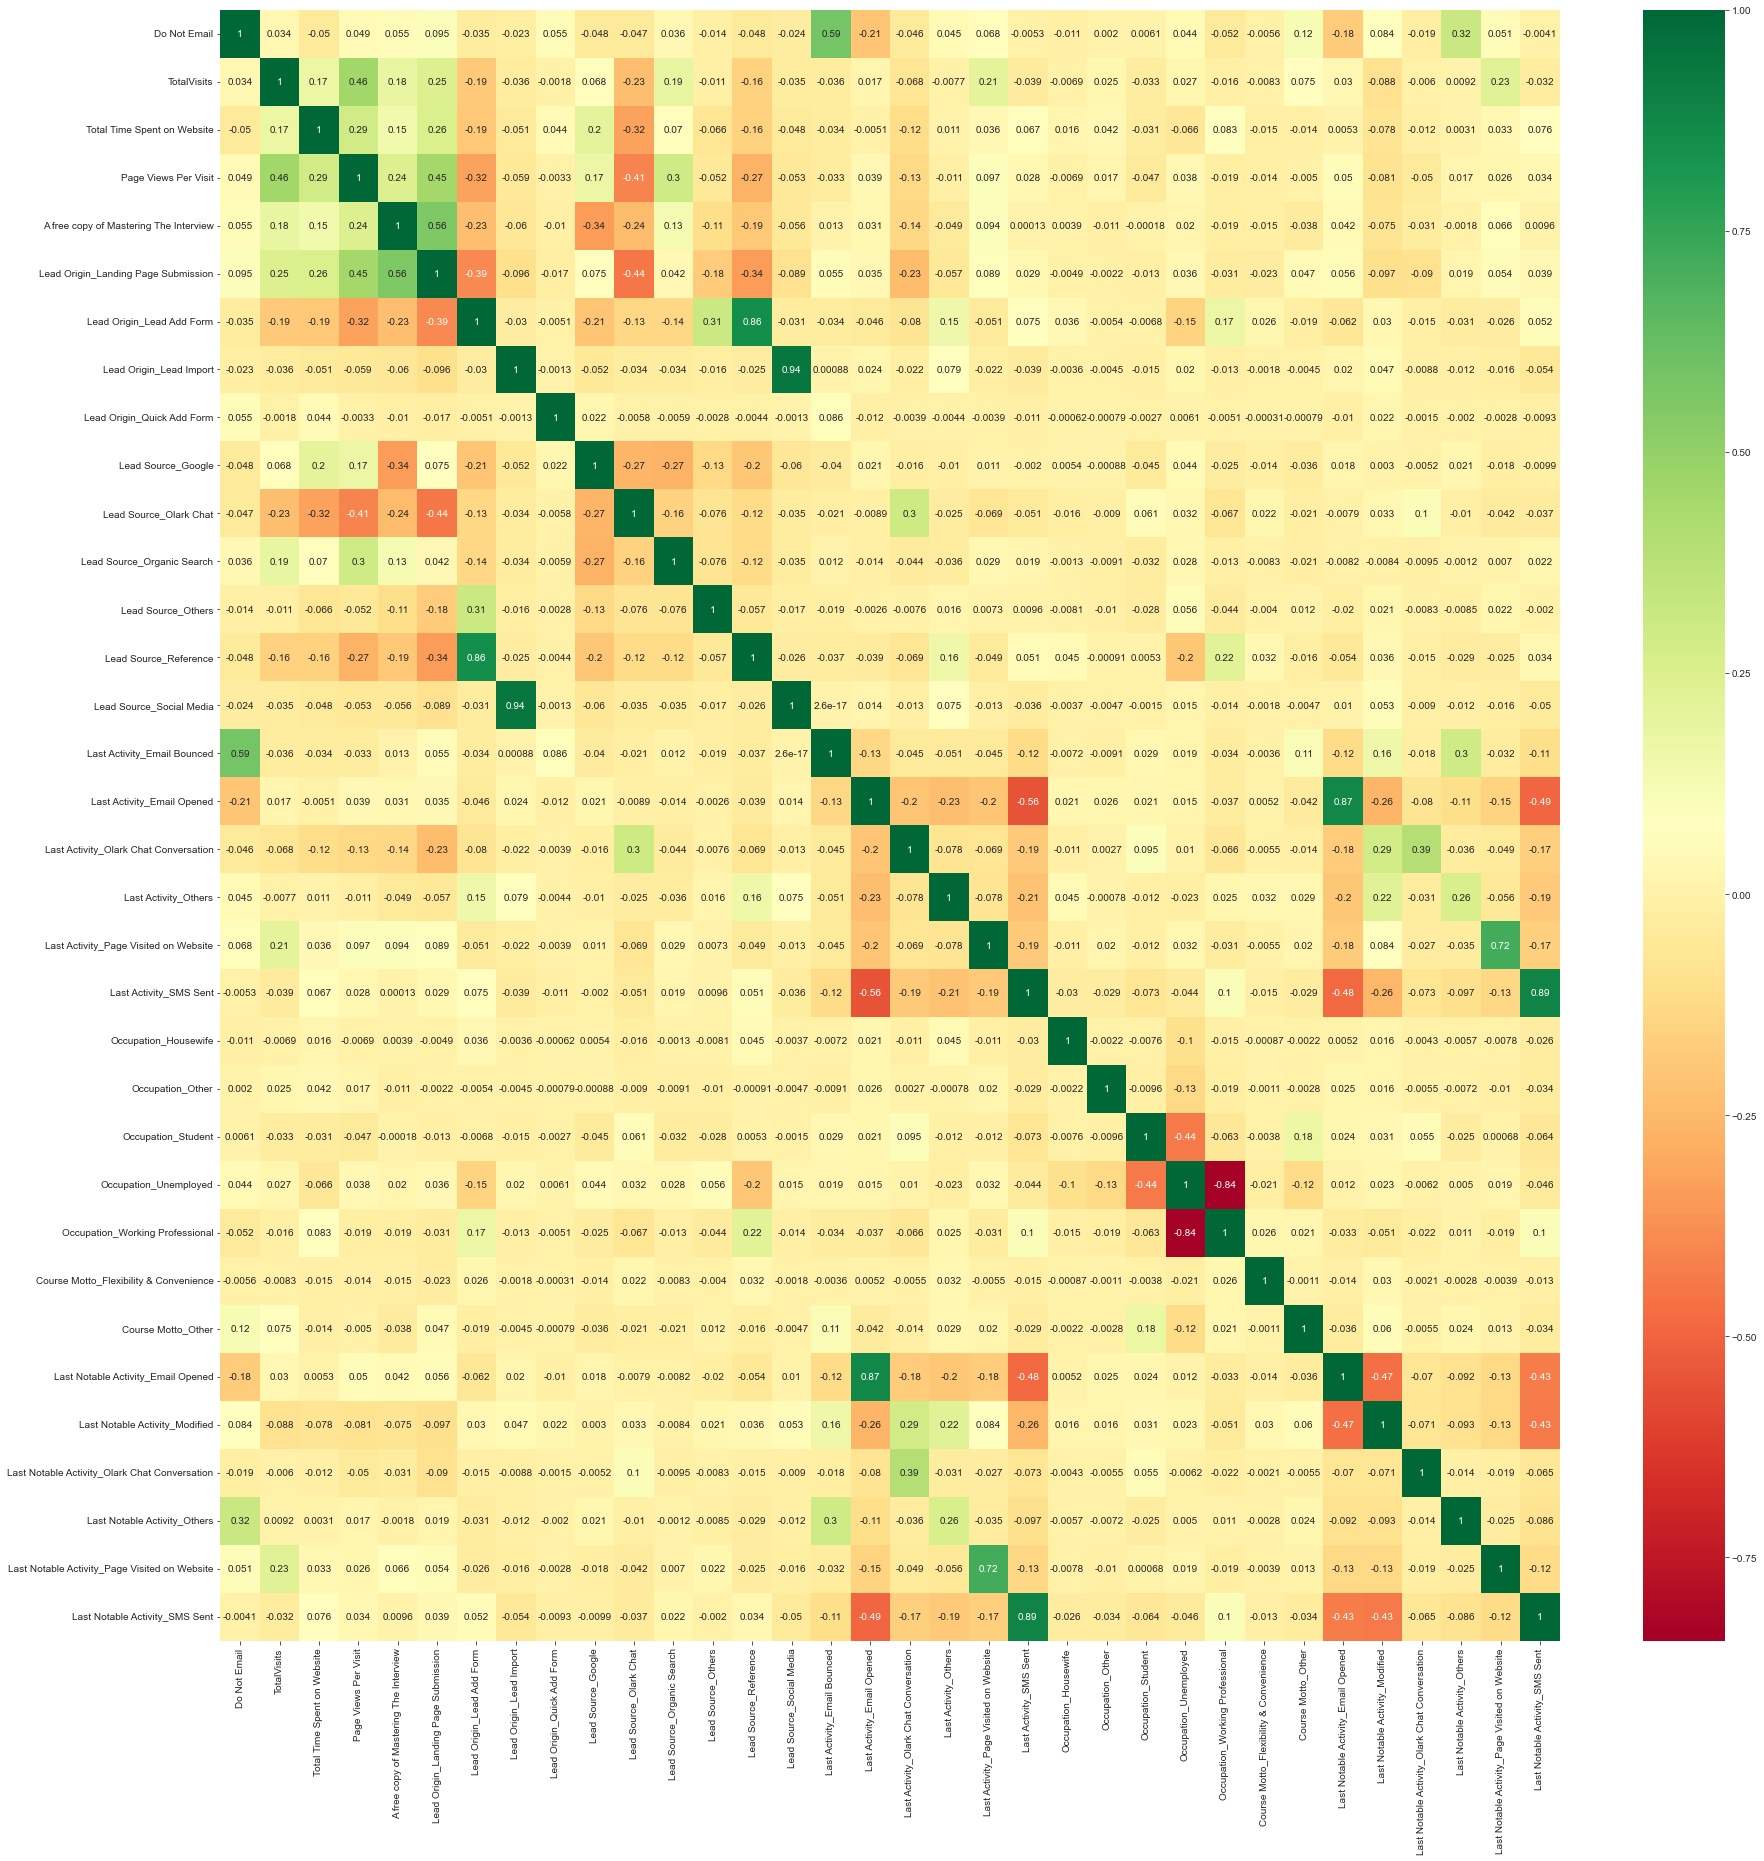

In [580]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30,30))
sns.heatmap(X_train.corr(), annot = True, cmap="RdYlGn")
plt.show()


#### Dropping highly correlated dummy variables

In [581]:
X_train = X_train.drop(['Occupation_Unemployed', 'Last Activity_SMS Sent','Last Activity_Page Visited on Website', 
                       'Last Activity_Email Opened', 'Lead Origin_Lead Import','Lead Origin_Lead Add Form' ], 1)



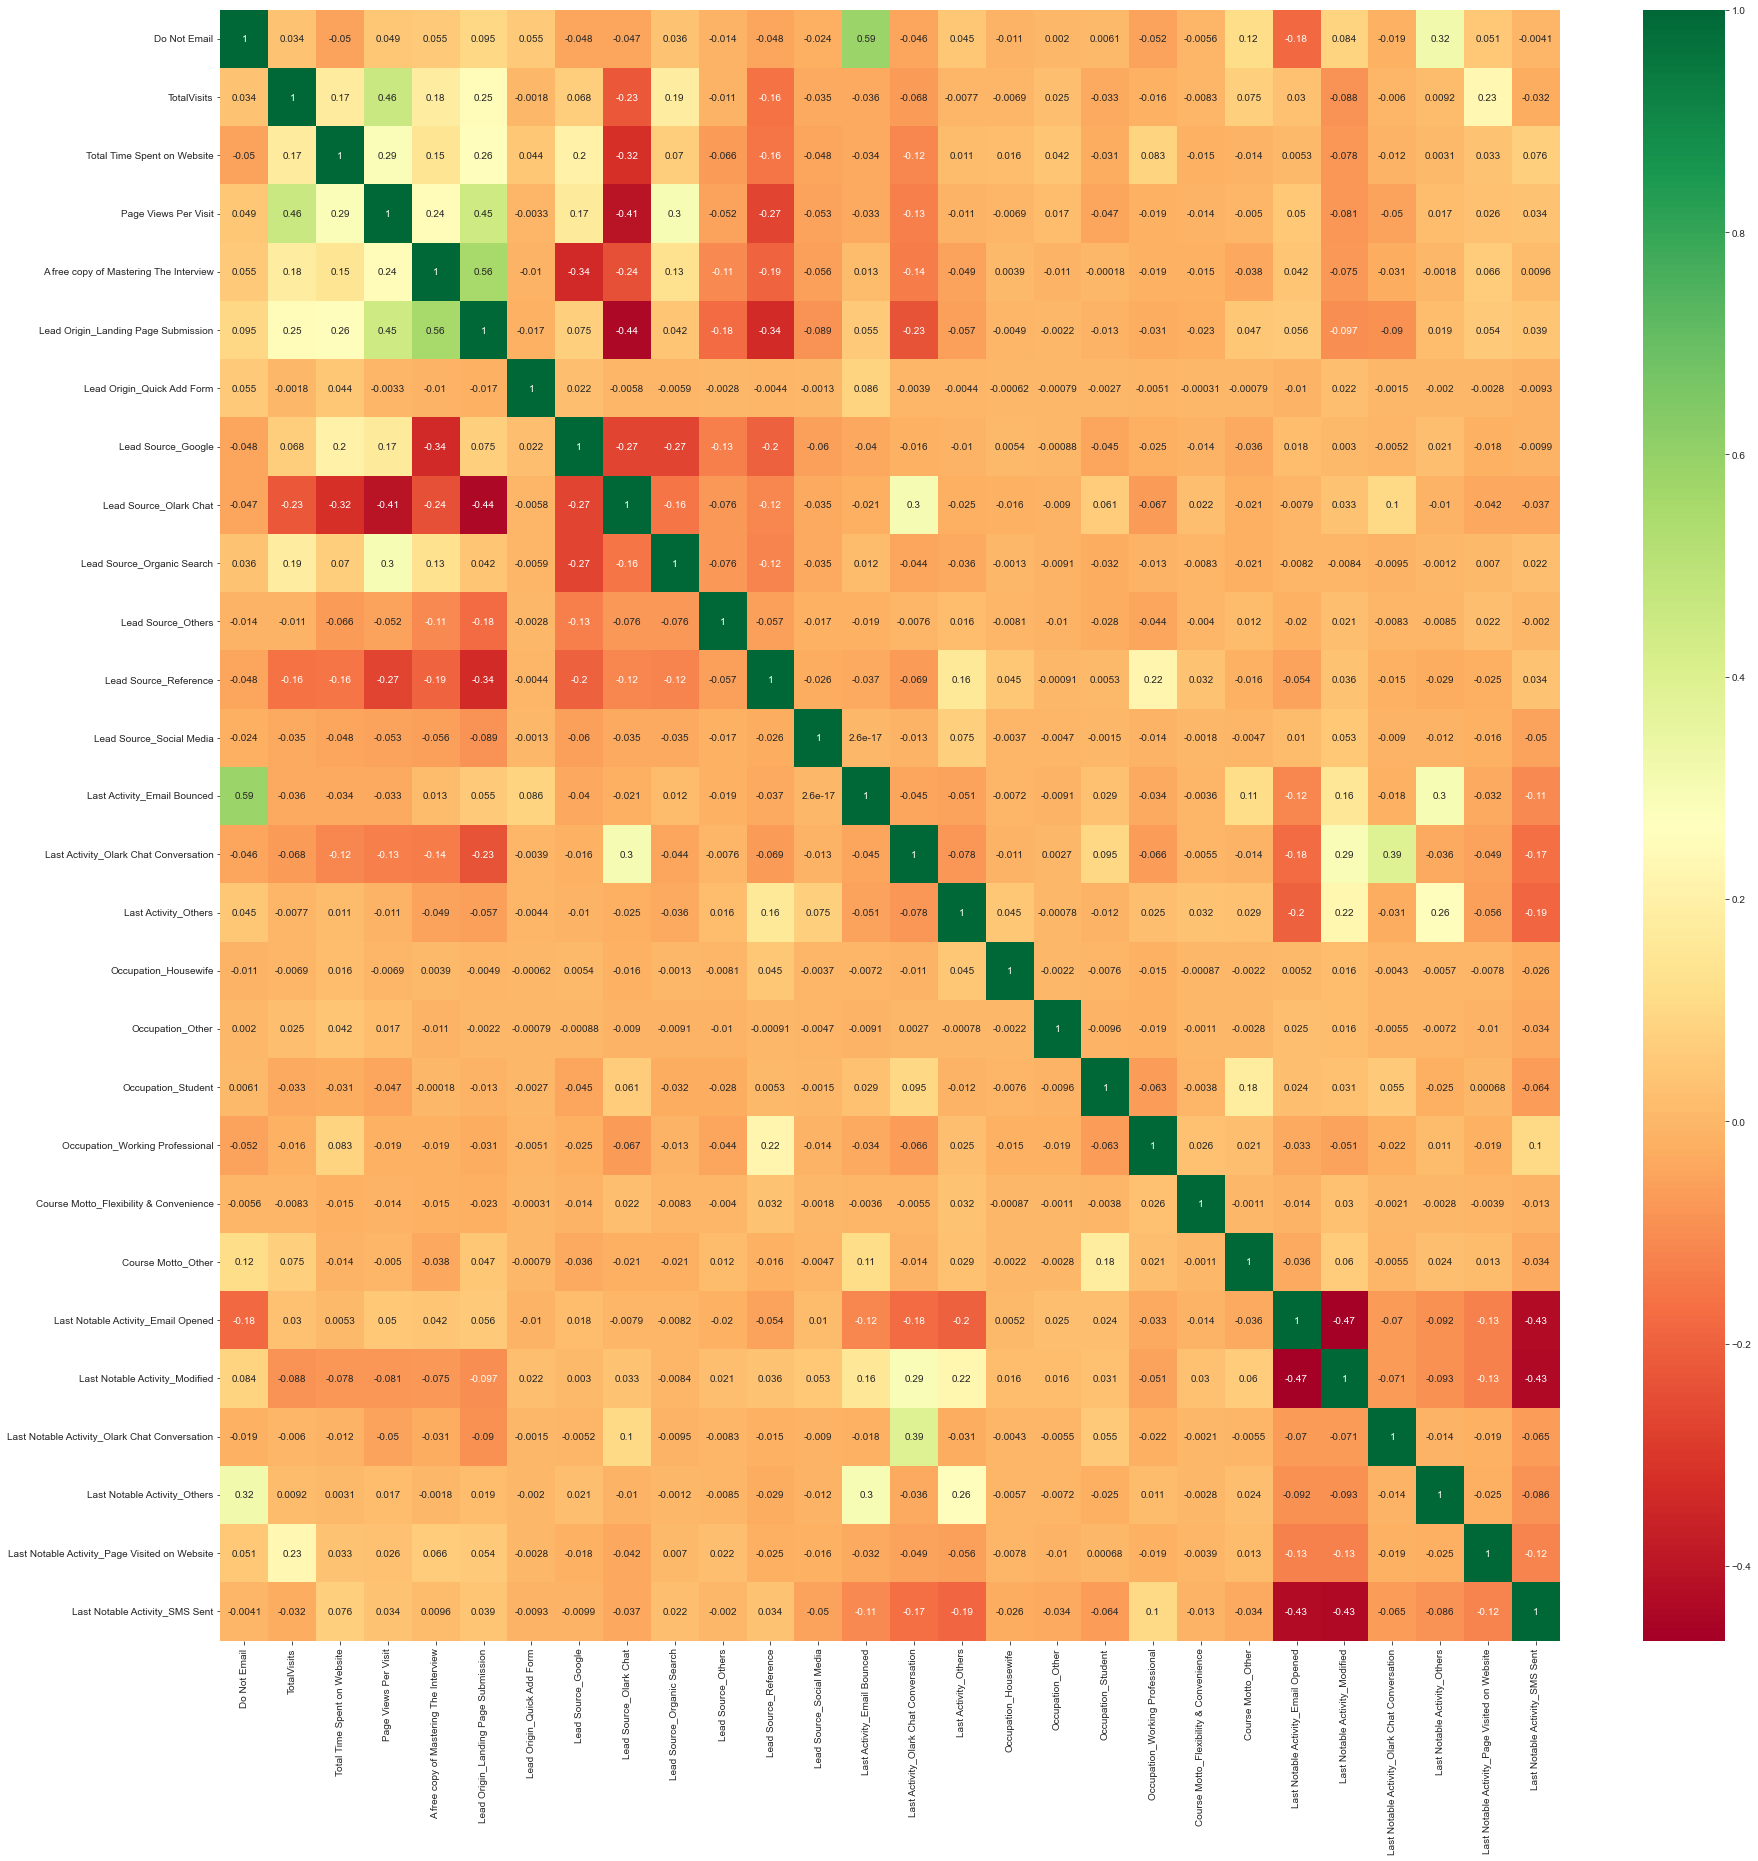

In [582]:
# After dropping highly correlated variables now let's check the correlation matrix again

plt.figure(figsize = (30,30))
sns.heatmap(X_train.corr(), annot = True, cmap="RdYlGn")
plt.show()


#  **Segment - IV : Model Building**

In [583]:
logreg = LogisticRegression()


## RFE

**Creating logistic regression model using a mixed approach. Starting with using RFE to find 15 variables and gradually dropping variables one by one manually.**

In [584]:
# Running RFE with the output number of the variable equal to 15

rfe = RFE(logreg,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)


In [585]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 8),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('A free copy of Mastering The Interview', False, 11),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Quick Add Form', False, 3),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 5),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Social Media', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', False, 4),
 ('Occupation_Housewife', True, 1),
 ('Occupation_Other', False, 2),
 ('Occupation_Student', False, 12),
 ('Occupation_Working Professional', True, 1),
 ('Course Motto_Flexibility & Convenience', False, 10),
 ('Course Motto_Other', True, 1),
 ('Last Notable Activity_Email Opened', False, 14),
 ('Last Notable Activity_Modified', True, 1),
 ('Last Notabl

In [586]:
# Features SELECTED by RFE

X_train.columns[rfe.support_]

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Occupation_Housewife',
       'Occupation_Working Professional', 'Course Motto_Other',
       'Last Notable Activity_Modified', 'Last Notable Activity_Others',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [587]:
# Features REJECTED by RFE

X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Quick Add Form',
       'Lead Source_Organic Search', 'Last Activity_Others',
       'Occupation_Other', 'Occupation_Student',
       'Course Motto_Flexibility & Convenience',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [588]:
# Creating X_train_rfe dataframe with RFE selected variables

col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_rfe.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Others,Lead Source_Reference,Lead Source_Social Media,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Occupation_Housewife,Occupation_Working Professional,Course Motto_Other,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
7574,0,-0.377497,1,0,0,0,0,0,0,0,0,0,0,0,1
2922,0,-0.958002,0,0,0,1,0,0,0,0,0,0,0,0,0
5603,0,1.914526,0,0,0,0,0,0,0,0,0,0,0,0,0
7191,0,0.995246,0,0,0,0,0,0,0,0,1,0,0,0,0
6223,0,0.774690,0,0,0,0,0,0,0,0,0,0,0,0,1


## **Required conditions for feature selection :**

**1. p-value < 0.05** -- Drop features which are the least helpful in prediction (drop p-value > 0.05).

**2. VIF < 5** -- Drop features that are redundant using correlations and VIF (drop VIF > 5).

## Function for calculating VIF

**Variance Inflation Factor or VIF**, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating 'VIF' is:

$ VIF_i = \frac{1}{1 - {R_i}^2} $

In [589]:
# Defining a function for calculating VIF.
# We will be using this function to find the VIF for every model.


def findVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    return vif


## Model_1

In [590]:
# Calculating the VIFs for RFE selected predictors

findVIF(X_train_rfe)

,Features,VIF
0,Do Not Email,1.73
7,Last Activity_Email Bounced,1.66
12,Last Notable Activity_Modified,1.61
3,Lead Source_Olark Chat,1.38
2,Lead Source_Google,1.35
14,Last Notable Activity_SMS Sent,1.35
8,Last Activity_Olark Chat Conversation,1.31
5,Lead Source_Reference,1.24
1,Total Time Spent on Website,1.21
13,Last Notable Activity_Others,1.20


In [591]:
# Adding a constant variable.

X_train_sm1 = sm.add_constant(X_train_rfe)

# Creating a fitted linear model
model_1 = sm.GLM(y_train, X_train_sm1, family = sm.families.Binomial()).fit()

# Summary of linear model
model_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4585
Model:                            GLM   Df Residuals:                     4569
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2160.8
Date:                Sat, 10 Sep 2022   Deviance:                       4321.7
Time:                        21:49:39   Pearson chi2:                 5.02e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3579
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.0304      0.075    -13.809      0.000      -1.177      -0.884
Do Not Email                             -1.1606      0.208     -5.566      0.000      -1.569      -0.752
Total Time Spent on Website               1.0487      0.045     23.122      0.000       0.960       1.138
Lead Source_Google                        0.5013      0.087      5.729      0.000       0.330       0.673
Lead Source_Olark Chat                    1.6487      0.126     13.122      0.000       1.402       1.895
Lead Source_Others                        2.5584      0.205     12.456      0.000       2.156       2.961
Lead Source_Reference                     3.6284      0.209     17.354      0.000       3.219       4.038
Lead Source_Social Media                  0.5615      0.434      1.292      0.196      -0.290       1.413
Last Activity_Email Bounced              -1.0262      0.390     -2.632      0.008      -1.790      -0.262
Last Activity_Olark Chat Conversation    -1.1624      0.190     -6.105      0.000      -1.536      -0.789
Occupation_Housewife                     23.1689   2.55e+04      0.001      0.999      -5e+04    5.01e+04
Occupation_Working Professional           2.4680      0.186     13.256      0.000       2.103       2.833
Course Motto_Other                      -22.3242   1.84e+04     -0.001      0.999   -3.61e+04    3.61e+04
Last Notable Activity_Modified           -0.4255      0.095     -4.471      0.000      -0.612      -0.239
Last Notable Activity_Others              1.3662      0.330      4.135      0.000       0.719       2.014
Last Notable Activity_SMS Sent            1.1742      0.093     12.583      0.000       0.991       1.357
=========================================================================================================
"""

In [592]:
# Dropping 'Course Motto_Other' because of very high p-value(0.999)

X_train_new = X_train_rfe.drop(['Course Motto_Other'], axis = 1)

## Model_2 

In [593]:
# Calculating the VIFs

findVIF(X_train_new)

,Features,VIF
0,Do Not Email,1.72
7,Last Activity_Email Bounced,1.66
11,Last Notable Activity_Modified,1.60
3,Lead Source_Olark Chat,1.38
2,Lead Source_Google,1.35
13,Last Notable Activity_SMS Sent,1.35
8,Last Activity_Olark Chat Conversation,1.31
5,Lead Source_Reference,1.24
1,Total Time Spent on Website,1.21
12,Last Notable Activity_Others,1.20


In [594]:
# Adding a constant variable.

X_train_sm2 = sm.add_constant(X_train_new)

# Creating a fitted linear model
model_2 = sm.GLM(y_train, X_train_sm2, family = sm.families.Binomial()).fit()

# Summary of linear model
model_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4585
Model:                            GLM   Df Residuals:                     4570
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2164.7
Date:                Sat, 10 Sep 2022   Deviance:                       4329.4
Time:                        21:49:39   Pearson chi2:                 5.01e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3569
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.0345      0.075    -13.860      0.000      -1.181      -0.888
Do Not Email                             -1.1929      0.207     -5.755      0.000      -1.599      -0.787
Total Time Spent on Website               1.0511      0.045     23.191      0.000       0.962       1.140
Lead Source_Google                        0.5096      0.087      5.827      0.000       0.338       0.681
Lead Source_Olark Chat                    1.6579      0.126     13.194      0.000       1.412       1.904
Lead Source_Others                        2.5533      0.204     12.502      0.000       2.153       2.954
Lead Source_Reference                     3.6421      0.209     17.418      0.000       3.232       4.052
Lead Source_Social Media                  0.5752      0.434      1.326      0.185      -0.275       1.426
Last Activity_Email Bounced              -1.0462      0.389     -2.686      0.007      -1.810      -0.283
Last Activity_Olark Chat Conversation    -1.1561      0.190     -6.076      0.000      -1.529      -0.783
Occupation_Housewife                     22.1701   1.55e+04      0.001      0.999   -3.03e+04    3.04e+04
Occupation_Working Professional           2.4242      0.182     13.328      0.000       2.068       2.781
Last Notable Activity_Modified           -0.4338      0.095     -4.568      0.000      -0.620      -0.248
Last Notable Activity_Others              1.3613      0.330      4.124      0.000       0.714       2.008
Last Notable Activity_SMS Sent            1.1784      0.093     12.630      0.000       0.996       1.361
=========================================================================================================
"""

In [595]:
# Dropping 'Occupation_Housewife' because of very high p-valie(0.999)

X_train_new = X_train_new.drop(['Occupation_Housewife'], axis = 1)

## Model_3

In [596]:
# Calculating the VIFs

findVIF(X_train_new)

,Features,VIF
0,Do Not Email,1.72
7,Last Activity_Email Bounced,1.66
10,Last Notable Activity_Modified,1.60
3,Lead Source_Olark Chat,1.38
2,Lead Source_Google,1.35
12,Last Notable Activity_SMS Sent,1.35
8,Last Activity_Olark Chat Conversation,1.31
5,Lead Source_Reference,1.23
1,Total Time Spent on Website,1.21
11,Last Notable Activity_Others,1.20


In [597]:
# Adding a constant variable.

X_train_sm3 = sm.add_constant(X_train_new)

# Creating a fitted linear model
model_3 = sm.GLM(y_train, X_train_sm3, family = sm.families.Binomial()).fit()

# Summary of linear model
model_3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4585
Model:                            GLM   Df Residuals:                     4571
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2168.9
Date:                Sat, 10 Sep 2022   Deviance:                       4337.8
Time:                        21:49:39   Pearson chi2:                 5.03e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3557
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.0308      0.075    -13.830      0.000      -1.177      -0.885
Do Not Email                             -1.1955      0.207     -5.767      0.000      -1.602      -0.789
Total Time Spent on Website               1.0531      0.045     23.240      0.000       0.964       1.142
Lead Source_Google                        0.5121      0.087      5.863      0.000       0.341       0.683
Lead Source_Olark Chat                    1.6571      0.126     13.194      0.000       1.411       1.903
Lead Source_Others                        2.5506      0.204     12.491      0.000       2.150       2.951
Lead Source_Reference                     3.6567      0.209     17.513      0.000       3.247       4.066
Lead Source_Social Media                  0.5710      0.434      1.316      0.188      -0.279       1.421
Last Activity_Email Bounced              -1.0498      0.389     -2.695      0.007      -1.813      -0.286
Last Activity_Olark Chat Conversation    -1.1625      0.190     -6.111      0.000      -1.535      -0.790
Occupation_Working Professional           2.4193      0.182     13.300      0.000       2.063       2.776
Last Notable Activity_Modified           -0.4298      0.095     -4.535      0.000      -0.616      -0.244
Last Notable Activity_Others              1.3603      0.330      4.120      0.000       0.713       2.007
Last Notable Activity_SMS Sent            1.1743      0.093     12.590      0.000       0.992       1.357
=========================================================================================================
"""

In [599]:
# Dropping 'Lead Source_Social Media' because of high p-value 0.188)

X_train_new = X_train_new.drop(['Lead Source_Social Media'], axis = 1)

## Model_4

In [600]:
# Calculating the VIFs

findVIF(X_train_new)

,Features,VIF
0,Do Not Email,1.72
6,Last Activity_Email Bounced,1.66
9,Last Notable Activity_Modified,1.58
3,Lead Source_Olark Chat,1.38
2,Lead Source_Google,1.35
11,Last Notable Activity_SMS Sent,1.35
7,Last Activity_Olark Chat Conversation,1.31
5,Lead Source_Reference,1.23
1,Total Time Spent on Website,1.20
10,Last Notable Activity_Others,1.20


In [601]:
# Adding a constant variable.

X_train_sm4 = sm.add_constant(X_train_new)

# Creating a fitted linear model
model_4 = sm.GLM(y_train, X_train_sm4, family = sm.families.Binomial()).fit()

# Summary of linear model
model_4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4585
Model:                            GLM   Df Residuals:                     4572
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2169.7
Date:                Sat, 10 Sep 2022   Deviance:                       4339.4
Time:                        21:51:32   Pearson chi2:                 5.03e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3555
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.0207      0.074    -13.788      0.000      -1.166      -0.876
Do Not Email                             -1.2022      0.207     -5.804      0.000      -1.608      -0.796
Total Time Spent on Website               1.0491      0.045     23.229      0.000       0.961       1.138
Lead Source_Google                        0.5024      0.087      5.779      0.000       0.332       0.673
Lead Source_Olark Chat                    1.6432      0.125     13.145      0.000       1.398       1.888
Lead Source_Others                        2.5369      0.204     12.448      0.000       2.137       2.936
Lead Source_Reference                     3.6415      0.208     17.477      0.000       3.233       4.050
Last Activity_Email Bounced              -1.0319      0.389     -2.656      0.008      -1.794      -0.270
Last Activity_Olark Chat Conversation    -1.1644      0.190     -6.122      0.000      -1.537      -0.792
Occupation_Working Professional           2.4206      0.182     13.303      0.000       2.064       2.777
Last Notable Activity_Modified           -0.4244      0.095     -4.482      0.000      -0.610      -0.239
Last Notable Activity_Others              1.3537      0.330      4.106      0.000       0.707       2.000
Last Notable Activity_SMS Sent            1.1706      0.093     12.565      0.000       0.988       1.353
=========================================================================================================
"""

In [602]:
# Dropping 'Last Activity_Email Bounced' because of high p-value(0.008)

X_train_new = X_train_new.drop(['Last Activity_Email Bounced'], axis = 1)


## Model_5

In [603]:
# Calculating the VIFs

findVIF(X_train_new)

,Features,VIF
8,Last Notable Activity_Modified,1.54
3,Lead Source_Olark Chat,1.38
10,Last Notable Activity_SMS Sent,1.35
2,Lead Source_Google,1.34
6,Last Activity_Olark Chat Conversation,1.30
0,Do Not Email,1.24
5,Lead Source_Reference,1.23
1,Total Time Spent on Website,1.20
7,Occupation_Working Professional,1.19
9,Last Notable Activity_Others,1.17


In [604]:
# Adding a constant variable.

X_train_sm5 = sm.add_constant(X_train_new)

# Creating a fitted linear model
model_5 = sm.GLM(y_train, X_train_sm5, family = sm.families.Binomial()).fit()

# Summary of linear model
model_5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4585
Model:                            GLM   Df Residuals:                     4573
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2173.5
Date:                Sat, 10 Sep 2022   Deviance:                       4347.0
Time:                        21:52:09   Pearson chi2:                 5.02e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3544
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.0187      0.074    -13.770      0.000      -1.164      -0.874
Do Not Email                             -1.4249      0.192     -7.406      0.000      -1.802      -1.048
Total Time Spent on Website               1.0466      0.045     23.216      0.000       0.958       1.135
Lead Source_Google                        0.5060      0.087      5.825      0.000       0.336       0.676
Lead Source_Olark Chat                    1.6346      0.125     13.094      0.000       1.390       1.879
Lead Source_Others                        2.5419      0.204     12.447      0.000       2.142       2.942
Lead Source_Reference                     3.6460      0.208     17.502      0.000       3.238       4.054
Last Activity_Olark Chat Conversation    -1.1425      0.190     -6.013      0.000      -1.515      -0.770
Occupation_Working Professional           2.4061      0.181     13.298      0.000       2.051       2.761
Last Notable Activity_Modified           -0.4484      0.094     -4.755      0.000      -0.633      -0.264
Last Notable Activity_Others              1.0936      0.306      3.578      0.000       0.495       1.693
Last Notable Activity_SMS Sent            1.1848      0.093     12.719      0.000       1.002       1.367
=========================================================================================================
"""

In [605]:
model_5.params

const                                   -1.018687
Do Not Email                            -1.424911
Total Time Spent on Website              1.046637
Lead Source_Google                       0.505991
Lead Source_Olark Chat                   1.634643
Lead Source_Others                       2.541909
Lead Source_Reference                    3.645952
Last Activity_Olark Chat Conversation   -1.142508
Occupation_Working Professional          2.406064
Last Notable Activity_Modified          -0.448406
Last Notable Activity_Others             1.093582
Last Notable Activity_SMS Sent           1.184782
dtype: float64

# **Segment V : Model Evaluation**

## Predicting the training data with Model-5

In [607]:
# Getting the predicted values on the train set

# y_train_pred with final model --> model_5

y_train_pred = model_5.predict(X_train_sm5)
y_train_pred[:10]

7574    0.568807
2922    0.835426
5603    0.728124
7191    0.919015
6223    0.726496
413     0.143008
1874    0.404506
4063    0.387217
8099    0.982547
2578    0.738617
dtype: float64

In [608]:
y_train_pred.values

array([0.56880666, 0.83542643, 0.72812423, ..., 0.08548526, 0.63610855,
       0.03306197])

In [609]:
# Reshaping to an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.56880666, 0.83542643, 0.72812423, 0.91901504, 0.72649555,
       0.14300841, 0.4045061 , 0.38721722, 0.98254721, 0.73861743])

In [610]:
y_train.head()

7574    1
2922    1
5603    1
7191    0
6223    1
Name: Converted, dtype: int64

In [611]:
y_train_pred_final = pd.DataFrame({'Converted' : y_train.values, 'Conversion_prob' : y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_prob,Prospect ID
0,1,0.568807,7574
1,1,0.835426,2922
2,1,0.728124,5603
3,0,0.919015,7191
4,1,0.726496,6223


**Considering a generic cut-off value of 0.5 and creating a new column 'predicted' with 1 if Conversion_prob > 0.5 else 0.**

In [612]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,Prospect ID,Predicted
0,1,0.568807,7574,1
1,1,0.835426,2922,1
2,1,0.728124,5603,1
3,0,0.919015,7191,1
4,1,0.726496,6223,1


**Confusion matrix**

In [613]:
# Creating a Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion


array([[1917,  434],
       [ 578, 1656]], dtype=int64)

In [ ]:
TP = confusion[1,1]  # True positive 
TN = confusion[0,0]  # True negatives
FP = confusion[0,1]  # False positives
FN = confusion[1,0]  # False negatives

**Calculating Important Metrics**

**Sensitivity**

In [614]:
# Calculating 'Sensitivity' for the logistic regression model

TP / float(TP+FN)

0.7764227642276422

**Specificity**

In [615]:
# Calculating 'Specificity' for the logistic regression model

TN / float(TN+FP)

0.7614678899082569

**Accuracy, Recall, Precision, F1_score for initial model with 0.5 cutoff**

In [616]:
# Finding Accuracy, Recall, Precision, F1_score for initial model with 0.5 cutoff

print("Accuracy, Recall, Precision, F1_score for initial model with 0.5 cutoff : \n")

print("Accuracy: ", accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print("Recall: ", recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print("Precision: ", precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print("F1-Score: ", f1_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

Accuracy, Recall, Precision, F1_score for initial model with 0.5 cutoff : 

Accuracy:  0.7792802617230098
Recall:  0.7412712623097583
Precision:  0.7923444976076555
F1-Score:  0.7659574468085106


In [617]:
# Calculating False Postive Rate (FPR) - predicting not converted when customer converted

print(FP/ float(TN+FP))

0.23853211009174313


## Plotting the ROC Curve

An ROC curve demonstrates the following things:

- It shows the tradeoff between 'Sensitivity' and 'Specificity' (any increase in Sensitivity will be accompanied by a decrease in Specificity).

- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [620]:
# Function for finding ROC


def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [621]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_prob,
                                         drop_intermediate = False )


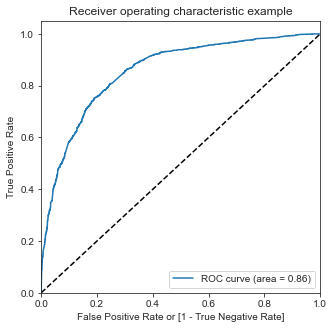

In [622]:
# Calling the function on 'y_train_pred_final.Converted' and 'y_train_pred_final.Conversion_prob'

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_prob)

The ideal ROC value should be as close to 1 as possible. Here we are the getting 0.86 which is a very good value.

## Finding Optimal Cutoff Point

**Previously we had chosen a random cutoff value of 0.5. But the 'Optimal Cutoff Point' is that probability value where we get balanced Sensitivity and Specificity**

In [623]:
# Creating columns with different probability cutoffs


numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_prob.map(lambda x : 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.568807,7574,1,1,1,1,1,1,1,0,0,0,0
1,1,0.835426,2922,1,1,1,1,1,1,1,1,1,1,0
2,1,0.728124,5603,1,1,1,1,1,1,1,1,1,0,0
3,0,0.919015,7191,1,1,1,1,1,1,1,1,1,1,1
4,1,0.726496,6223,1,1,1,1,1,1,1,1,1,0,0


In [624]:
# Now calculating 'Accuracy', 'Sensitivity' and 'Specificity' for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob-cutoff','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1]  # True positive 
# TN = confusion[0,0]  # True negatives
# FP = confusion[0,1]  # False positives
# FN = confusion[1,0]  # False negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i , accuracy, sensitivity, specificity]
print(cutoff_df)

     prob-cutoff  accuracy  sensitivity  specificity
0.0          0.0  0.487241     1.000000     0.000000
0.1          0.1  0.548310     0.991047     0.127605
0.2          0.2  0.701854     0.943151     0.472565
0.3          0.3  0.757470     0.915398     0.607401
0.4          0.4  0.775354     0.848254     0.706083
0.5          0.5  0.779280     0.741271     0.815398
0.6          0.6  0.761178     0.659803     0.857507
0.7          0.7  0.729553     0.533572     0.915781
0.8          0.8  0.692475     0.421218     0.950234
0.9          0.9  0.627917     0.259176     0.978307


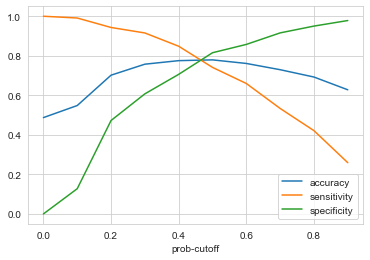

In [625]:
# Plotting 'Accuracy', 'Sensitivity' and 'Specificity' for various probability cut-off values.

sns.set_style('whitegrid')
cutoff_df.plot.line(x='prob-cutoff', y=['accuracy','sensitivity','specificity'])
plt.show()

**From the curve above, 0.45 is the optimum point to take it as a cutoff probability.**

In [626]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_prob.map( lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.568807,7574,1,1,1,1,1,1,1,0,0,0,0,1
1,1,0.835426,2922,1,1,1,1,1,1,1,1,1,1,0,1
2,1,0.728124,5603,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.919015,7191,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.726496,6223,1,1,1,1,1,1,1,1,1,0,0,1


## Confusion matrix

In [627]:
# Creating a Confusion matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2


array([[1820,  531],
       [ 485, 1749]], dtype=int64)

In [628]:
TP = confusion2[1,1]  # True positive 
TN = confusion2[0,0]  # True negatives
FP = confusion2[0,1]  # False positives
FN = confusion2[1,0]  # False negatives

## Calculating Important Metrics

### Sensitivity

In [629]:
# Calculating 'Sensitivity'

TP / float(TP+FN)

0.7829006266786034

### Specificity

In [630]:
# Calculating 'Specificity'

TN / float(TN+FP)

0.7741386643981285

### Precision (TP / TP + FP) and Recall (TP / TP + FN)

**Accuracy, Recall, Precision, F1_score for probability cutoff 0.28**

In [631]:
# Finding Precision and Recall for probability cut off of 0.28

print("Accuracy, Recall, Precision, f1_score for probability cutoff 0.28 : \n")
print("Accuracy: ", accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))
print("Recall: ", recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))
print("Precision: ", precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))
print("F1-Score: ", f1_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy, Recall, Precision, f1_score for probability cutoff 0.28 : 

Accuracy:  0.7784078516902945
Recall:  0.7829006266786034
Precision:  0.7671052631578947
F1-Score:  0.7749224634470536


## Precision and Recall tradeoff

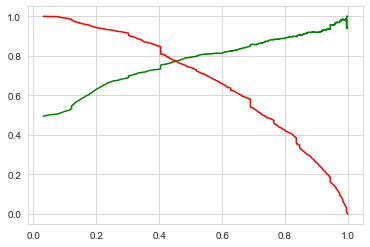

In [632]:

p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [633]:
sns.set_style('ticks')

In [634]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.568807,7574,1,1,1,1,1,1,1,0,0,0,0,1
1,1,0.835426,2922,1,1,1,1,1,1,1,1,1,1,0,1
2,1,0.728124,5603,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.919015,7191,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.726496,6223,1,1,1,1,1,1,1,1,1,0,0,1


## Accuracy, Recall, Precision, F1_score based on Precision and Recall tradeoff on train data with cutoff as 0.42

In [635]:
# Accuracy, Recall, Precision, f1_score based on Precision and Recall tradeoff cutoff as 0.42


print("Accuracy, Recall, Precision, f1_score based on Precision and Recall tradeoff on train data with cutoff as 0.42 : \n")

print("Accuracy: ", accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))
print("Recall: ", recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))
print("Precision: ", precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))
print("F1-Score: ", f1_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy, Recall, Precision, f1_score based on Precision and Recall tradeoff on train data with cutoff as 0.42 : 

Accuracy:  0.7784078516902945
Recall:  0.8012533572068039
Precision:  0.7578323454699407
F1-Score:  0.7789382071366405


In [636]:
# Creating a Confusion matrix

confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion3


array([[1779,  572],
       [ 444, 1790]], dtype=int64)

In [637]:
TP = confusion3[1,1]  # True positive 
TN = confusion3[0,0]  # True negatives
FP = confusion3[0,1]  # False positives
FN = confusion3[1,0]  # False negatives

In [638]:
# Calculating 'Sensitivity'

TP / float(TP+FN)

0.8012533572068039

In [639]:
# Calculating 'Specificity'

TN / float(TN+FP)

0.7566992769034453

In [640]:
# Calculating False Postive Rate (FPR) - predicting not converted when customer converted

print(FP/ float(TN+FP))

0.24330072309655465


# **Segment VI : Test Data**

## Rescaling features of test data

In [641]:
cont_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [642]:
X_test[cont_cols] = scaler.transform(X_test[cont_cols] )
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Social Media,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Course Motto_Flexibility & Convenience,Course Motto_Other,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
2215,1,0.619604,0.312403,0.459066,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
98,0,0.250010,1.000540,1.140832,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3412,0,-0.119584,0.688232,0.231810,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2863,0,-0.119584,-0.915655,0.231810,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2547,0,1.913182,1.701027,-0.422685,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [643]:
X_train_new.columns

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Reference',
       'Last Activity_Olark Chat Conversation',
       'Occupation_Working Professional', 'Last Notable Activity_Modified',
       'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [644]:
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]
X_test_new.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Others,Lead Source_Reference,Last Activity_Olark Chat Conversation,Occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
2215,1,0.312403,1,0,0,0,0,0,1,0,0
98,0,1.000540,1,0,0,0,1,1,1,0,0
3412,0,0.688232,0,0,0,0,0,0,0,0,0
2863,0,-0.915655,0,0,0,0,0,0,1,0,0
2547,0,1.701027,1,0,0,0,0,1,0,0,0


In [645]:
X_test_new.shape

(1965, 11)

In [646]:
# Adding constant variable to test dataframe

X_test_sm = sm.add_constant(X_test_new)
X_test_sm.head()

,const,Do Not Email,Total Time Spent on Website,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Others,Lead Source_Reference,Last Activity_Olark Chat Conversation,Occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
2215,1.0,1,0.312403,1,0,0,0,0,0,1,0,0
98,1.0,0,1.000540,1,0,0,0,1,1,1,0,0
3412,1.0,0,0.688232,0,0,0,0,0,0,0,0,0
2863,1.0,0,-0.915655,0,0,0,0,0,0,1,0,0
2547,1.0,0,1.701027,1,0,0,0,0,1,0,0,0


## Predictions on Test data using Final Model

In [647]:
# Making predictions using the final model :  model_5

y_test_pred = model_5.predict(X_test_sm)
y_test_pred[:10]

2215    0.113142
98      0.794073
3412    0.425959
2863    0.081252
2547    0.975247
2994    0.885349
5408    0.689559
7547    0.591498
205     0.835426
502     0.630967
dtype: float64

In [648]:
# Converting y_test_pred from an array to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
2215,0.113142
98,0.794073
3412,0.425959
2863,0.081252
2547,0.975247


In [649]:
y_test.head()

2215    0
98      1
3412    1
2863    0
2547    1
Name: Converted, dtype: int64

In [650]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
2215,0
98,1
3412,1
2863,0
2547,1


In [651]:
# Putting CustID to index

y_test_df['Prospect ID'] = y_test_df.index
y_test_df.head()

,Converted,Prospect ID
2215,0,2215
98,1,98
3412,1,3412
2863,0,2863
2547,1,2547


In [652]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Concatenating y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,2215,0.113142
1,1,98,0.794073
2,1,3412,0.425959
3,0,2863,0.081252
4,1,2547,0.975247


In [653]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_prob'})
y_pred_final.head()

,Converted,Prospect ID,Conversion_prob
0,0,2215,0.113142
1,1,98,0.794073
2,1,3412,0.425959
3,0,2863,0.081252
4,1,2547,0.975247


In [654]:
# Re-arranging the columns

y_pred_final = y_pred_final[['Prospect ID','Converted','Conversion_prob']]
y_pred_final.head()

,Prospect ID,Converted,Conversion_prob
0,2215,0,0.113142
1,98,1,0.794073
2,3412,1,0.425959
3,2863,0,0.081252
4,2547,1,0.975247


In [655]:
# Make predictions on the test set using 0.42 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

,Prospect ID,Converted,Conversion_prob,final_predicted
0,2215,0,0.113142,0
1,98,1,0.794073,1
2,3412,1,0.425959,1
3,2863,0,0.081252,0
4,2547,1,0.975247,1


## Assigning a Lead Score

In [656]:
# Assigning a Lead Score between 0 and 100 to each of the leads which can be used by the company to target potential leads. 

y_pred_final['Lead_Score'] = y_pred_final.Conversion_prob.map(lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Conversion_prob,final_predicted,Lead_Score
0,2215,0,0.113142,0,11
1,98,1,0.794073,1,79
2,3412,1,0.425959,1,43
3,2863,0,0.081252,0,8
4,2547,1,0.975247,1,98


## Accuracy, Recall, Precision, F1_score on Test data of final model with 0.33 cutoff

In [657]:
# Finding Accuracy, Recall, Precision, f1_score on Test data of final model with 0.33 cutoff

print("Accuracy, Recall, Precision, f1_score on test data with final model with 0.33 cutoff : \n")

print("Accuracy: ", accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))
print("Recall: ", recall_score(y_pred_final.Converted, y_pred_final.final_predicted))
print("Precision: ", precision_score(y_pred_final.Converted, y_pred_final.final_predicted))
print("F1-Score: ", f1_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy, Recall, Precision, f1_score on test data with final model with 0.33 cutoff : 

Accuracy:  0.776590330788804
Recall:  0.7983281086729362
Precision:  0.7564356435643564
F1-Score:  0.7768174885612608


In [658]:
confusion4 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion4

array([[762, 246],
       [193, 764]], dtype=int64)

In [659]:
TP = confusion4[1,1]  # True positive 
TN = confusion4[0,0]  # True negatives
FP = confusion4[0,1]  # False positives
FN = confusion4[1,0]  # False negatives

In [660]:
# Calculating 'Sensitivity'

TP / float(TP+FN)

0.7983281086729362

In [661]:
# Calculating 'Specificity'

TN / float(TN+FP)

0.7559523809523809

In [662]:
# Calculating False Postive Rate (FPR) - predicting not converted when customer converted

print(FP/ float(TN+FP))

0.24404761904761904


# **Summary**

In [664]:
round(model_5.params, 3)

const                                   -1.019
Do Not Email                            -1.425
Total Time Spent on Website              1.047
Lead Source_Google                       0.506
Lead Source_Olark Chat                   1.635
Lead Source_Others                       2.542
Lead Source_Reference                    3.646
Last Activity_Olark Chat Conversation   -1.143
Occupation_Working Professional          2.406
Last Notable Activity_Modified          -0.448
Last Notable Activity_Others             1.094
Last Notable Activity_SMS Sent           1.185
dtype: float64

In [ ]:
X_test_new.columns


**Accuracy, Recall, Precision, F1_score based on Precision and Recall tradeoff cutoff as 0.33 :** 

- Accuracy:  0.9084135361688916
- Recall:  0.8847087378640777
- Precision: 0.8776083467094703
- F1-Score:  0.8811442385173247
- Specificity: 0.9060453400503778
 
 

**Accuracy, Recall, Precision, F1_score on test data with final model with 0.33 cutoff :**

- Accuracy:  0.8993482983345402
- Recall:  0.870754716981132
- Precision: 0.8674812030075187
- F1-Score:  0.8691148775894538
- Specificity: 0.9171562867215041

**The following variables affect the Conversion rate :**

- Do Not Email
- Total Time Spent on Website        
- Lead Source_Olark Chat             
- Lead Source_Others                          
- Lead Source_Reference
- Tags_Closed by Horizzon
- Tags_Interested in other courses
- Tags_Ringing 
- Tags_Will revert after reading the email
- Tags_switched off  
- Last Notable Activity_SMS Sent  
- Occupation_Unemployed  
- Occupation_Working Professional
 
 
 *Out of these, 'Total Time Spent on Website', 'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Reference', 'Tags_Closed by Horizzon','Tags_Will revert after reading the email', 'Last Notable Activity_SMS Sent', 'Occupation_Unemployed', 'Occupation_Working Professional' have positive coefficient.*
 
 *Whereas,  'Do Not Email', 'Tags_Interested in other courses', 'Tags_Ringing', 'Tags_switched off' have negative coefficients.*
 
 
 
**Coefficients of the predictors are found to be the following:**
 
    Do Not Email = -1.569
    Total Time Spent on Website = 1.020
    Lead Source_Olark Chat = 1.117
    Lead Source_Others = 2.538
    Lead Source_Reference = 1.598
    Tags_Closed by Horizzon = 5.343
    Tags_Interested in other courses = -3.237
    Tags_Ringing = -4.251
    Tags_Will revert after reading the email = 4.084
    Tags_switched off = -4.453
    Last Notable Activity_SMS Sent = 2.538
    Occupation_Unemployed = 1.238
    Occupation_Working Professional = 1.989

In [ ]:
round(model_3.params, 3)

**The top 3 features which are contributing significantly towards the probability of a lead getting converted are the following :**

1. 'Tags_Closed by Horizzon' : It is the tag assigned to customers indicating the current status of the lead.


2. 'Tags_Will revert after reading the email' : It is the tag assigned to customers indicating the current status of the lead. It has a positive correlation with the target variable, which indicates that customers who possibly revert after reading the email are potential hot leads.


3. 'Tags_switched off', 'Tags_Ringing' :